```{warning}

This chapter contains some code examples that require the PyMC3 package, which is incompatible with current versions of Python (requires Python ≤ 3.6). If you want to run these examples, you may need to downgrade your Python version, install the package, and uncomment the code blocks.

```

# Chapter 19: Bayesian Statistics
## 1. Introduction to Bayesian Statistics
Bayesian statistics represents a fundamentally different approach to statistical inference compared to the frequentist methods we've explored in previous chapters. Rather than treating parameters as fixed but unknown quantities, Bayesian statistics views parameters as random variables with probability distributions.

The Bayesian approach is named after Thomas Bayes, whose theorem forms the mathematical foundation of this statistical paradigm. Bayesian methods allow us to:

1. Incorporate prior knowledge into our analyses
2. Update our beliefs as new data becomes available
3. Make probabilistic statements directly about parameters
4. Handle uncertainty in a more intuitive way
In this chapter, we'll explore the mathematical foundations of Bayesian statistics, implement Bayesian analyses in Python, and apply these methods to psychological research questions.

### 1.1 Bayes' Theorem: The Foundation
At the heart of Bayesian statistics is Bayes' theorem, which describes how to update our beliefs about a hypothesis given new evidence:

$$P(H|D) = \frac{P(D|H) \cdot P(H)}{P(D)}$$

Where:

- $P(H|D)$ is the posterior probability of hypothesis $H$ given data $D$
- $P(D|H)$ is the likelihood of observing data $D$ under hypothesis $H$
- $P(H)$ is the prior probability of hypothesis $H$
- $P(D)$ is the marginal likelihood or evidence (the probability of observing data $D$ under all possible hypotheses)
The denominator $P(D)$ can be calculated using the law of total probability:

$$P(D) = \sum_{i} P(D|H_i) \cdot P(H_i)$$

For continuous hypotheses, this becomes an integral:

$$P(D) = \int P(D|H) \cdot P(H) , dH$$

Let's implement Bayes' theorem for a simple example:

In [21]:
import warnings
warnings.filterwarnings('ignore')

  Hypothesis  Prior  Posterior
0     No ESP    0.9    0.52108
1    Has ESP    0.1    0.47892


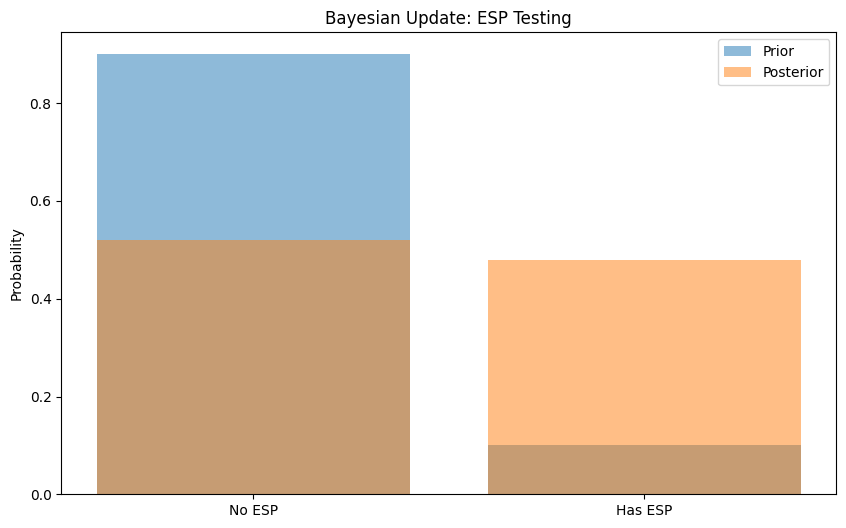

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

def bayes_theorem(prior, likelihood, data):
    """
    Apply Bayes' theorem to update prior beliefs given new data.
    
    Parameters:
    -----------
    prior : array-like
        Prior probabilities for each hypothesis
    likelihood : function
        Function that takes hypothesis and data and returns likelihood
    data : array-like
        Observed data
        
    Returns:
    --------
    posterior : array-like
        Posterior probabilities for each hypothesis
    """
    # Calculate likelihood for each hypothesis
    likelihoods = np.array([likelihood(h, data) for h in range(len(prior))])
    
    # Calculate marginal likelihood
    marginal_likelihood = np.sum(likelihoods * prior)
    
    # Calculate posterior
    posterior = (likelihoods * prior) / marginal_likelihood
    
    return posterior

# Example: Testing for ESP
# Hypothesis: Person has ESP (can guess cards better than chance)
# Data: Number of correct guesses out of 25 trials

# Prior: We believe ESP is unlikely (10% chance)
prior = np.array([0.9, 0.1])  # [No ESP, Has ESP]

# Likelihood function: Binomial probability
def likelihood(hypothesis, data):
    n_trials = 25
    n_correct = data
    
    if hypothesis == 0:  # No ESP (p = 0.2, chance level)
        return stats.binom.pmf(n_correct, n_trials, 0.2)
    else:  # Has ESP (p = 0.5)
        return stats.binom.pmf(n_correct, n_trials, 0.5)

# Observed data: 10 correct guesses
data = 10

# Calculate posterior
posterior = bayes_theorem(prior, likelihood, data)

# Display results
hypotheses = ['No ESP', 'Has ESP']
results = pd.DataFrame({
    'Hypothesis': hypotheses,
    'Prior': prior,
    'Posterior': posterior
})

print(results)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(hypotheses, prior, alpha=0.5, label='Prior')
plt.bar(hypotheses, posterior, alpha=0.5, label='Posterior')
plt.ylabel('Probability')
plt.title('Bayesian Update: ESP Testing')
plt.legend()
plt.show()

### 1.2 The Bayesian Framework in Psychology
Bayesian statistics has gained popularity in psychology for several reasons:

1. Incorporating Prior Knowledge : Psychological theories often provide expectations about effect sizes or relationships that can be formalized as priors.
2. Intuitive Interpretation : Statements like "there is a 95% probability that the true effect is between X and Y" are direct interpretations of Bayesian credible intervals, unlike frequentist confidence intervals.
3. Handling Small Samples : Bayesian methods can provide more reasonable estimates with small samples, which are common in psychological research.
4. Accumulating Evidence : The sequential updating of beliefs aligns with how scientific knowledge accumulates over time.
5. Model Comparison : Bayesian methods offer principled ways to compare competing psychological theories.
Let's explore a psychological example: estimating the probability that a treatment for depression is effective.

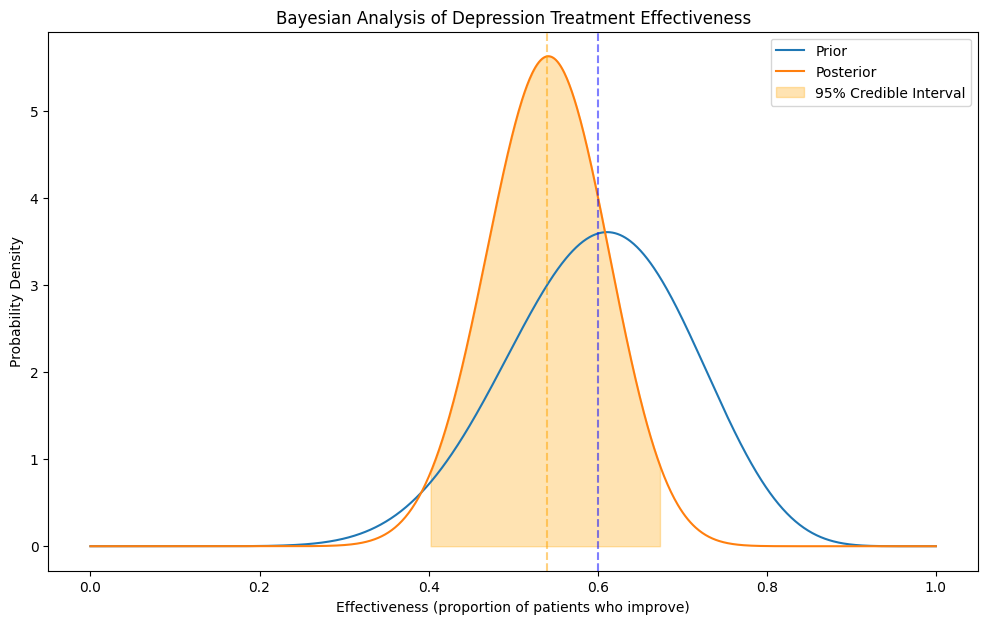

Prior mean: 0.600
Posterior mean: 0.540
95% Credible Interval: [0.402, 0.675]
Probability that treatment is better than placebo (0.3): 1.000


In [2]:
# Example: Treatment effectiveness for depression
# We'll model the effectiveness as a binomial parameter (proportion of patients who improve)

def plot_beta_distribution(alpha, beta, label=None):
    """Plot a Beta distribution with given parameters."""
    x = np.linspace(0, 1, 1000)
    y = stats.beta.pdf(x, alpha, beta)
    plt.plot(x, y, label=label)
    return x, y

# Prior: Based on previous studies, we believe the treatment works for about 60% of patients
# with some uncertainty (equivalent to observing 12 successes out of 20 patients)
prior_alpha = 12
prior_beta = 8

# Data: In our new study, 15 out of 30 patients improved
data_success = 15
data_failure = 30 - 15

# Calculate posterior parameters (conjugate prior property of Beta-Binomial)
posterior_alpha = prior_alpha + data_success
posterior_beta = prior_beta + data_failure

# Plot prior and posterior
plt.figure(figsize=(12, 7))
x, prior_y = plot_beta_distribution(prior_alpha, prior_beta, label='Prior')
_, posterior_y = plot_beta_distribution(posterior_alpha, posterior_beta, label='Posterior')

# Add vertical lines for means
prior_mean = prior_alpha / (prior_alpha + prior_beta)
posterior_mean = posterior_alpha / (posterior_alpha + posterior_beta)

plt.axvline(prior_mean, color='blue', linestyle='--', alpha=0.5)
plt.axvline(posterior_mean, color='orange', linestyle='--', alpha=0.5)

# Calculate 95% credible interval for posterior
ci_low, ci_high = stats.beta.ppf([0.025, 0.975], posterior_alpha, posterior_beta)
plt.fill_between(x, 0, posterior_y, where=(x >= ci_low) & (x <= ci_high), 
                 color='orange', alpha=0.3, label='95% Credible Interval')

plt.xlabel('Effectiveness (proportion of patients who improve)')
plt.ylabel('Probability Density')
plt.title('Bayesian Analysis of Depression Treatment Effectiveness')
plt.legend()
plt.show()

# Print summary statistics
print(f"Prior mean: {prior_mean:.3f}")
print(f"Posterior mean: {posterior_mean:.3f}")
print(f"95% Credible Interval: [{ci_low:.3f}, {ci_high:.3f}]")
print(f"Probability that treatment is better than placebo (0.3): {1 - stats.beta.cdf(0.3, posterior_alpha, posterior_beta):.3f}")

## 2. Bayesian Parameter Estimation
One of the primary applications of Bayesian statistics is parameter estimation. Instead of point estimates, Bayesian methods provide entire probability distributions for parameters.

### 2.1 Conjugate Priors
Conjugate priors are mathematically convenient because they result in posterior distributions from the same family as the prior. Some common conjugate relationships include:

1. Beta-Binomial : Beta prior for a binomial likelihood (proportion parameter)
2. Normal-Normal : Normal prior for a normal likelihood with known variance
3. Gamma-Poisson : Gamma prior for a Poisson likelihood (rate parameter)
Let's implement Bayesian estimation of a normal mean with a conjugate prior:

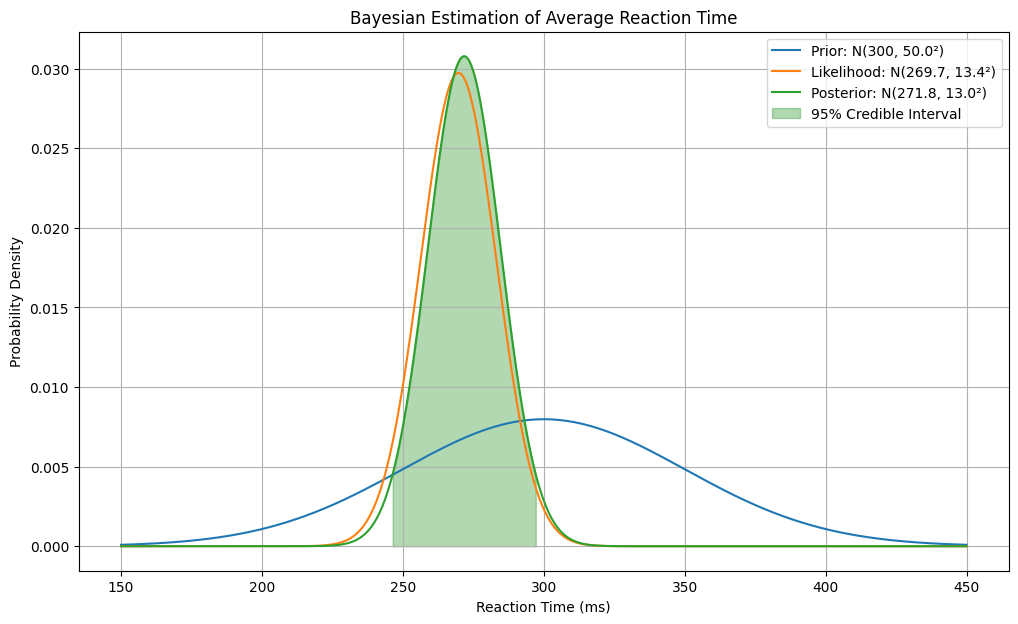

Prior mean: 300 ms, Prior SD: 50.0 ms
Sample mean: 269.7 ms, Sample SD: 57.6 ms
Posterior mean: 271.8 ms, Posterior SD: 13.0 ms
95% Credible Interval: [246.4, 297.2] ms


In [3]:
# Bayesian estimation of a normal mean with known variance
# Example: Estimating average reaction time in a psychological experiment

def normal_normal_update(prior_mean, prior_var, data, data_var):
    """
    Update a normal prior with normal data (known variance).
    
    Parameters:
    -----------
    prior_mean : float
        Mean of the prior distribution
    prior_var : float
        Variance of the prior distribution
    data : array-like
        Observed data points
    data_var : float
        Known variance of the data
        
    Returns:
    --------
    posterior_mean : float
        Mean of the posterior distribution
    posterior_var : float
        Variance of the posterior distribution
    """
    n = len(data)
    sample_mean = np.mean(data)
    
    # Calculate posterior parameters
    posterior_var = 1 / (1/prior_var + n/data_var)
    posterior_mean = posterior_var * (prior_mean/prior_var + n*sample_mean/data_var)
    
    return posterior_mean, posterior_var

# Prior: Based on previous studies, reaction times are around 300ms with standard deviation 50ms
prior_mean = 300
prior_var = 50**2

# Data: Observed reaction times from 20 participants (in milliseconds)
np.random.seed(42)
true_mean = 280  # True population mean (unknown in real scenario)
data_std = 60    # Known standard deviation of measurements
data = np.random.normal(true_mean, data_std, size=20)
data_var = data_std**2

# Calculate posterior
posterior_mean, posterior_var = normal_normal_update(prior_mean, prior_var, data, data_var)
posterior_std = np.sqrt(posterior_var)

# Plot prior, likelihood, and posterior
x = np.linspace(150, 450, 1000)
prior = stats.norm.pdf(x, prior_mean, np.sqrt(prior_var))
likelihood = stats.norm.pdf(x, np.mean(data), data_std/np.sqrt(len(data)))
posterior = stats.norm.pdf(x, posterior_mean, posterior_std)

plt.figure(figsize=(12, 7))
plt.plot(x, prior, label=f'Prior: N({prior_mean}, {np.sqrt(prior_var):.1f}²)')
plt.plot(x, likelihood, label=f'Likelihood: N({np.mean(data):.1f}, {data_std/np.sqrt(len(data)):.1f}²)')
plt.plot(x, posterior, label=f'Posterior: N({posterior_mean:.1f}, {posterior_std:.1f}²)')

# Add 95% credible interval
ci_low, ci_high = stats.norm.ppf([0.025, 0.975], posterior_mean, posterior_std)
plt.fill_between(x, 0, posterior, where=(x >= ci_low) & (x <= ci_high), 
                 color='green', alpha=0.3, label='95% Credible Interval')

plt.xlabel('Reaction Time (ms)')
plt.ylabel('Probability Density')
plt.title('Bayesian Estimation of Average Reaction Time')
plt.legend()
plt.grid(True)
plt.show()

# Print summary statistics
print(f"Prior mean: {prior_mean} ms, Prior SD: {np.sqrt(prior_var):.1f} ms")
print(f"Sample mean: {np.mean(data):.1f} ms, Sample SD: {np.std(data, ddof=1):.1f} ms")
print(f"Posterior mean: {posterior_mean:.1f} ms, Posterior SD: {posterior_std:.1f} ms")
print(f"95% Credible Interval: [{ci_low:.1f}, {ci_high:.1f}] ms")

### 2.2 Non-Conjugate Priors and Numerical Methods
When conjugate priors aren't available or appropriate, we need numerical methods to approximate the posterior distribution. Common approaches include:

1. Grid Approximation : Evaluating the posterior on a grid of parameter values
2. Markov Chain Monte Carlo (MCMC) : Generating samples from the posterior distribution
3. Variational Inference : Approximating the posterior with a simpler distribution
Let's implement grid approximation for a simple example:

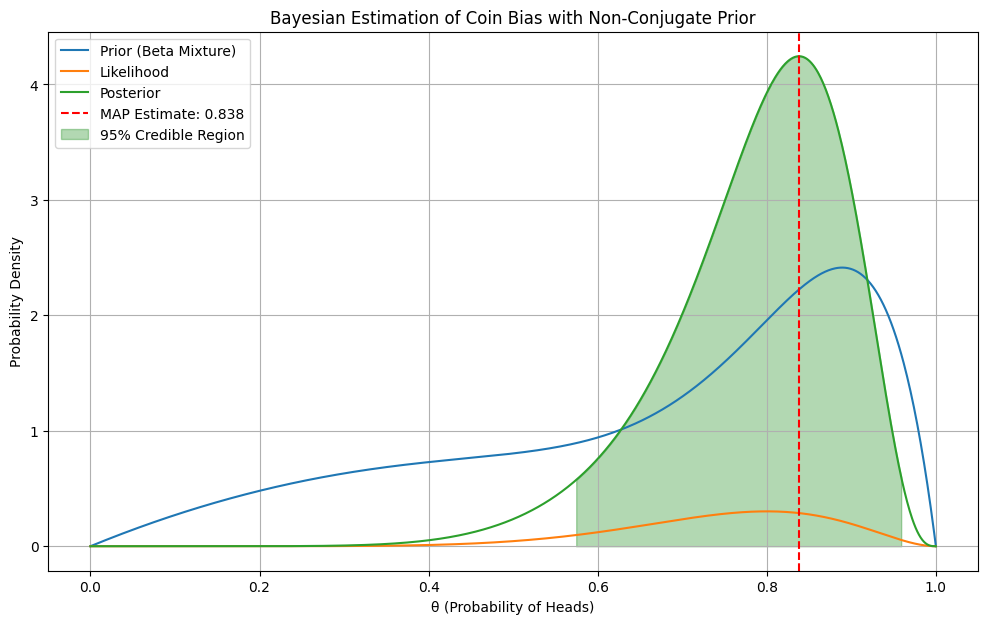

MAP Estimate: 0.838
95% Credible Region: [0.575, 0.959]


In [4]:
def grid_approximation(prior, likelihood_func, data, grid_points):
    """
    Approximate posterior distribution using a grid of parameter values.
    
    Parameters:
    -----------
    prior : function
        Prior probability density function
    likelihood_func : function
        Likelihood function that takes parameter and data
    data : array-like
        Observed data
    grid_points : array-like
        Grid of parameter values to evaluate
        
    Returns:
    --------
    posterior : array-like
        Posterior probability density at each grid point
    """
    # Evaluate prior at each grid point
    prior_prob = prior(grid_points)
    
    # Evaluate likelihood at each grid point
    likelihood = np.array([likelihood_func(theta, data) for theta in grid_points])
    
    # Calculate unnormalized posterior
    posterior_unnorm = likelihood * prior_prob
    
    # Normalize posterior
    posterior = posterior_unnorm / np.sum(posterior_unnorm)
    
    return posterior * len(grid_points)  # Scale to get density

# Example: Estimating the probability of a biased coin
# We'll use a non-conjugate prior (a mixture of two beta distributions)

def mixture_beta_prior(theta):
    """A mixture of two beta distributions as a non-conjugate prior."""
    beta1 = stats.beta.pdf(theta, 2, 2)  # Centered around 0.5
    beta2 = stats.beta.pdf(theta, 10, 2)  # Centered around 0.83
    return 0.5 * beta1 + 0.5 * beta2

def binomial_likelihood(theta, data):
    """Binomial likelihood function."""
    n_trials, n_success = data
    return stats.binom.pmf(n_success, n_trials, theta)

# Data: 8 heads out of 10 coin flips
data = (10, 8)

# Create grid of parameter values
grid_points = np.linspace(0, 1, 1000)

# Calculate posterior using grid approximation
posterior = grid_approximation(mixture_beta_prior, binomial_likelihood, data, grid_points)

# Plot prior, likelihood, and posterior
plt.figure(figsize=(12, 7))
plt.plot(grid_points, mixture_beta_prior(grid_points), label='Prior (Beta Mixture)')
plt.plot(grid_points, [binomial_likelihood(theta, data) for theta in grid_points], label='Likelihood')
plt.plot(grid_points, posterior, label='Posterior')

# Find maximum a posteriori (MAP) estimate
map_idx = np.argmax(posterior)
map_estimate = grid_points[map_idx]
plt.axvline(map_estimate, color='red', linestyle='--', label=f'MAP Estimate: {map_estimate:.3f}')

# Calculate 95% credible interval
# Sort grid points by posterior density
sorted_idx = np.argsort(posterior)[::-1]
sorted_grid = grid_points[sorted_idx]
sorted_posterior = posterior[sorted_idx]
cumulative_prob = np.cumsum(sorted_posterior) / np.sum(sorted_posterior)
credible_idx = cumulative_prob <= 0.95
credible_region = sorted_grid[credible_idx]
plt.fill_between(grid_points, 0, posterior, where=(grid_points >= min(credible_region)) & 
                 (grid_points <= max(credible_region)), color='green', alpha=0.3, 
                 label='95% Credible Region')

plt.xlabel('θ (Probability of Heads)')
plt.ylabel('Probability Density')
plt.title('Bayesian Estimation of Coin Bias with Non-Conjugate Prior')
plt.legend()
plt.grid(True)
plt.show()

# Print summary statistics
print(f"MAP Estimate: {map_estimate:.3f}")
print(f"95% Credible Region: [{min(credible_region):.3f}, {max(credible_region):.3f}]")

## 3. Markov Chain Monte Carlo (MCMC)
For more complex models, grid approximation becomes computationally infeasible. Markov Chain Monte Carlo (MCMC) methods allow us to sample from the posterior distribution without having to compute it explicitly.

### 3.1 Metropolis-Hastings Algorithm
The Metropolis-Hastings algorithm is a classic MCMC method:

1. Start with an initial parameter value
2. Propose a new value from a proposal distribution
3. Accept or reject the proposal based on the posterior ratio
4. Repeat steps 2-3 many times
Let's implement the Metropolis-Hastings algorithm:

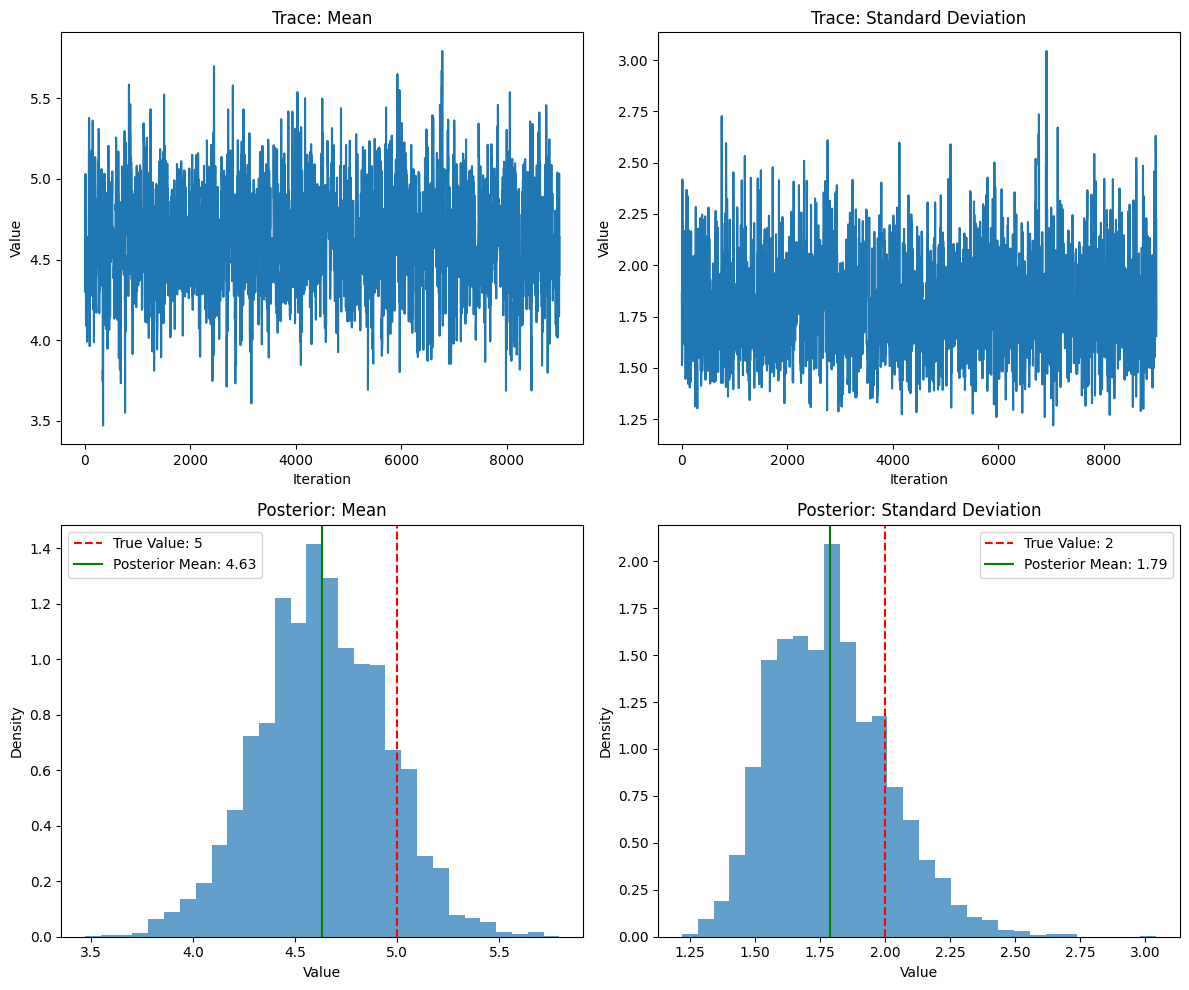

Acceptance rate: 0.35
Posterior mean: 4.63 (95% CI: [4.01, 5.23])
Posterior standard deviation: 1.79 (95% CI: [1.42, 2.27])


In [5]:
def metropolis_hastings(log_posterior, initial_value, n_samples, proposal_width):
    """
    Generate samples from a posterior distribution using the Metropolis-Hastings algorithm.
    
    Parameters:
    -----------
    log_posterior : function
        Function that calculates the log posterior density
    initial_value : float or array
        Starting point for the Markov chain
    n_samples : int
        Number of samples to generate
    proposal_width : float
        Standard deviation of the normal proposal distribution
        
    Returns:
    --------
    samples : array
        Generated samples from the posterior
    acceptance_rate : float
        Proportion of proposals that were accepted
    """
    # Initialize samples array with correct dimensions for multivariate case
    n_params = len(initial_value) if isinstance(initial_value, (list, np.ndarray)) else 1
    samples = np.zeros((n_samples, n_params)) if n_params > 1 else np.zeros(n_samples)
    
    # Set initial value
    if n_params > 1:
        samples[0,:] = initial_value
    else:
        samples[0] = initial_value
    
    # Counter for accepted proposals
    n_accepted = 0
    
    for i in range(1, n_samples):
        # Current value
        current = samples[i-1]
        
        # Propose new value(s)
        if n_params > 1:
            proposal = current + np.random.normal(0, proposal_width, size=n_params)
        else:
            proposal = current + np.random.normal(0, proposal_width)
        
        # Calculate log acceptance ratio
        try:
            log_accept_ratio = log_posterior(proposal) - log_posterior(current)
        except (ValueError, TypeError):
            # If proposal leads to invalid values, reject it
            log_accept_ratio = -np.inf
        
        # Accept or reject
        if np.log(np.random.random()) < log_accept_ratio:
            samples[i] = proposal
            n_accepted += 1
        else:
            samples[i] = current
    
    acceptance_rate = n_accepted / (n_samples - 1)
    return samples, acceptance_rate

def log_posterior(params, data):
    """
    Calculate log posterior for normal mean and precision (1/variance).
    
    Parameters:
    -----------
    params : array-like
        [mean, log_precision]
    data : array-like
        Observed data
        
    Returns:
    --------
    log_post : float
        Log posterior density
    """
    mean, log_precision = params
    precision = np.exp(log_precision)
    variance = 1 / precision
    
    # Prior on mean: Normal(0, 10²)
    log_prior_mean = stats.norm.logpdf(mean, 0, 10)
    
    # Prior on precision: Gamma(1, 1)
    log_prior_precision = stats.gamma.logpdf(precision, 1, scale=1) + log_precision  # Jacobian adjustment
    
    # Likelihood: Normal(mean, variance)
    log_likelihood = np.sum(stats.norm.logpdf(data, mean, np.sqrt(variance)))
    
    return log_prior_mean + log_prior_precision + log_likelihood

# Generate some data
np.random.seed(42)
true_mean = 5
true_std = 2
data = np.random.normal(true_mean, true_std, size=30)

# Define log posterior function for our specific data
log_post = lambda params: log_posterior(params, data)

# Run Metropolis-Hastings
initial_params = [0, 0]  # [mean, log_precision]
n_samples = 10000
proposal_width = 0.5

samples, acceptance_rate = metropolis_hastings(log_post, initial_params, n_samples, proposal_width)

# Discard burn-in period and convert log_precision to standard deviation
burn_in = 1000
mean_samples = samples[burn_in:, 0]
std_samples = np.sqrt(1 / np.exp(samples[burn_in:, 1]))

# Plot traces and histograms
plt.figure(figsize=(12, 10))

# Trace plots
plt.subplot(2, 2, 1)
plt.plot(mean_samples)
plt.title('Trace: Mean')
plt.xlabel('Iteration')
plt.ylabel('Value')

plt.subplot(2, 2, 2)
plt.plot(std_samples)
plt.title('Trace: Standard Deviation')
plt.xlabel('Iteration')
plt.ylabel('Value')

# Histogram plots
plt.subplot(2, 2, 3)
plt.hist(mean_samples, bins=30, alpha=0.7, density=True)
plt.axvline(true_mean, color='red', linestyle='--', label=f'True Value: {true_mean}')
plt.axvline(np.mean(mean_samples), color='green', linestyle='-', label=f'Posterior Mean: {np.mean(mean_samples):.2f}')
plt.title('Posterior: Mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(std_samples, bins=30, alpha=0.7, density=True)
plt.axvline(true_std, color='red', linestyle='--', label=f'True Value: {true_std}')
plt.axvline(np.mean(std_samples), color='green', linestyle='-', label=f'Posterior Mean: {np.mean(std_samples):.2f}')
plt.title('Posterior: Standard Deviation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Acceptance rate: {acceptance_rate:.2f}")
print(f"Posterior mean: {np.mean(mean_samples):.2f} (95% CI: [{np.percentile(mean_samples, 2.5):.2f}, {np.percentile(mean_samples, 97.5):.2f}])")
print(f"Posterior standard deviation: {np.mean(std_samples):.2f} (95% CI: [{np.percentile(std_samples, 2.5):.2f}, {np.percentile(std_samples, 97.5):.2f}])")

## 4. Bayesian Hypothesis Testing
Bayesian hypothesis testing offers an alternative to traditional null hypothesis significance testing (NHST). Instead of p-values, Bayesian approaches use Bayes factors or posterior probabilities.

### 4.1 Bayes Factors
The Bayes factor is the ratio of the marginal likelihoods under two competing hypotheses:

$$BF_{10} = \frac{P(D|H_1)}{P(D|H_0)}$$

Where:

- $BF_{10}$ is the Bayes factor in favor of $H_1$ over $H_0$
- $P(D|H_1)$ is the marginal likelihood under hypothesis $H_1$
- $P(D|H_0)$ is the marginal likelihood under hypothesis $H_0$
Let's implement Bayes factor calculation for a simple t-test:

Bayes Factor (BF10): 0.03
Interpretation: Very strong evidence for H0
t-statistic: 3.10
p-value: 0.0030


C:\Users\khoda\AppData\Local\Temp\ipykernel_7548\1860958350.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([control_scores, treatment_scores], labels=['Control', 'Treatment'])


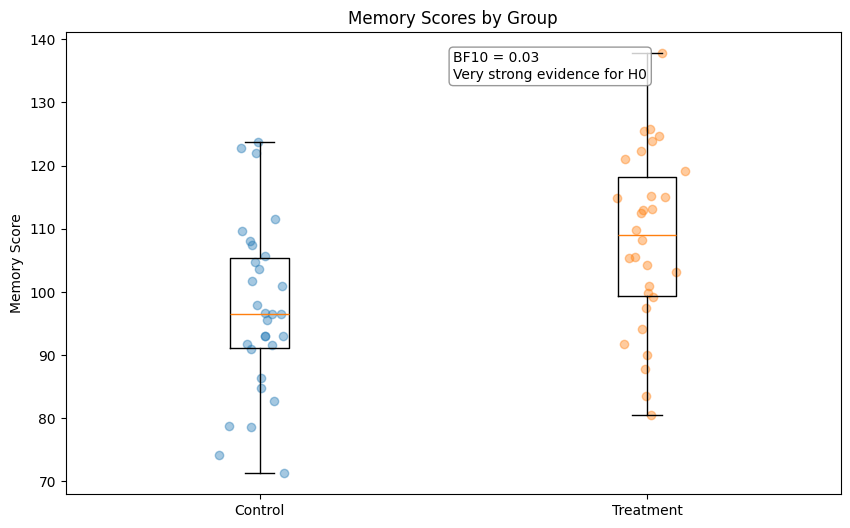

In [6]:
def bayes_factor_t_test(x, y, scale=0.707):
    """
    Calculate Bayes factor for a two-sample t-test.
    
    Parameters:
    -----------
    x : array-like
        First sample
    y : array-like
        Second sample
    scale : float
        Scale parameter for the Cauchy prior on effect size
        
    Returns:
    --------
    bf10 : float
        Bayes factor in favor of the alternative hypothesis
    """
    from scipy.stats import ttest_ind
    
    # Calculate t-statistic and degrees of freedom
    t_stat, _ = ttest_ind(x, y, equal_var=True)
    df = len(x) + len(y) - 2
    
    # Calculate Bayes factor using BayesFactor package approximation
    bf10 = np.exp(t_stat**2/2) / (1 + t_stat**2/(df*scale**2))**(df/2)
    
    return bf10

# Example: Testing if a cognitive training program improves memory scores
np.random.seed(42)

# Control group
control_scores = np.random.normal(100, 15, size=30)

# Treatment group (with a true effect)
treatment_scores = np.random.normal(110, 15, size=30)

# Calculate Bayes factor
bf10 = bayes_factor_t_test(treatment_scores, control_scores)

# Interpret Bayes factor
def interpret_bayes_factor(bf):
    if bf > 100:
        return "Extreme evidence for H1"
    elif bf > 30:
        return "Very strong evidence for H1"
    elif bf > 10:
        return "Strong evidence for H1"
    elif bf > 3:
        return "Moderate evidence for H1"
    elif bf > 1:
        return "Anecdotal evidence for H1"
    elif bf > 1/3:
        return "Anecdotal evidence for H0"
    elif bf > 1/10:
        return "Moderate evidence for H0"
    elif bf > 1/30:
        return "Strong evidence for H0"
    elif bf > 1/100:
        return "Very strong evidence for H0"
    else:
        return "Extreme evidence for H0"

# Print results
print(f"Bayes Factor (BF10): {bf10:.2f}")
print(f"Interpretation: {interpret_bayes_factor(bf10)}")

# Compare with traditional t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(treatment_scores, control_scores)
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

# Plot data
plt.figure(figsize=(10, 6))
plt.boxplot([control_scores, treatment_scores], labels=['Control', 'Treatment'])
plt.ylabel('Memory Score')
plt.title('Memory Scores by Group')

# Add individual data points
for i, data in enumerate([control_scores, treatment_scores]):
    x = np.random.normal(i+1, 0.04, size=len(data))
    plt.scatter(x, data, alpha=0.4)

plt.annotate(f"BF10 = {bf10:.2f}\n{interpret_bayes_factor(bf10)}", 
             xy=(0.5, 0.9), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.show()

### 4.2 Bayesian Estimation and Hypothesis Testing in Psychology
Let's apply Bayesian methods to a classic psychological research question: Does cognitive behavioral therapy (CBT) reduce depression symptoms?

In [7]:
def bayesian_t_test(x, y, prior_scale=0.707, n_samples=10000):
    """
    Perform a Bayesian t-test and return posterior samples of the effect size.
    
    Parameters:
    -----------
    x : array-like
        First sample (e.g., treatment group)
    y : array-like
        Second sample (e.g., control group)
    prior_scale : float
        Scale parameter for the Cauchy prior on effect size
    n_samples : int
        Number of posterior samples to generate
        
    Returns:
    --------
    effect_samples : array
        Posterior samples of the effect size (Cohen's d)
    bf10 : float
        Bayes factor in favor of the alternative hypothesis
    """
    # Calculate sample statistics
    nx, ny = len(x), len(y)
    mean_x, mean_y = np.mean(x), np.mean(y)
    var_x, var_y = np.var(x, ddof=1), np.var(y, ddof=1)
    
    # Pooled standard deviation
    pooled_sd = np.sqrt(((nx - 1) * var_x + (ny - 1) * var_y) / (nx + ny - 2))
    
    # Observed effect size (Cohen's d)
    observed_d = (mean_x - mean_y) / pooled_sd
    
    # Degrees of freedom
    df = nx + ny - 2
    
    # Standard error of d
    se_d = np.sqrt((nx + ny) / (nx * ny) + observed_d**2 / (2 * (nx + ny)))
    
    # Generate posterior samples using importance sampling
    # First, generate samples from a t-distribution (proposal distribution)
    proposal_samples = stats.t.rvs(df, loc=observed_d, scale=se_d, size=n_samples)
    
    # Calculate importance weights
    prior_density = stats.cauchy.pdf(proposal_samples, scale=prior_scale)
    proposal_density = stats.t.pdf(proposal_samples, df, loc=observed_d, scale=se_d)
    weights = prior_density / proposal_density
    
    # Normalize weights
    weights = weights / np.sum(weights)
    
    # Resample with replacement according to weights
    effect_samples = np.random.choice(proposal_samples, size=n_samples, p=weights)
    
    # Calculate Bayes factor using Savage-Dickey density ratio
    # Density at d=0 for posterior divided by density at d=0 for prior
    posterior_density_at_zero = stats.gaussian_kde(effect_samples)(0)[0]
    prior_density_at_zero = stats.cauchy.pdf(0, scale=prior_scale)
    bf01 = posterior_density_at_zero / prior_density_at_zero
    bf10 = 1 / bf01
    
    return effect_samples, bf10

Now let's use this function with a realistic example from psychology:

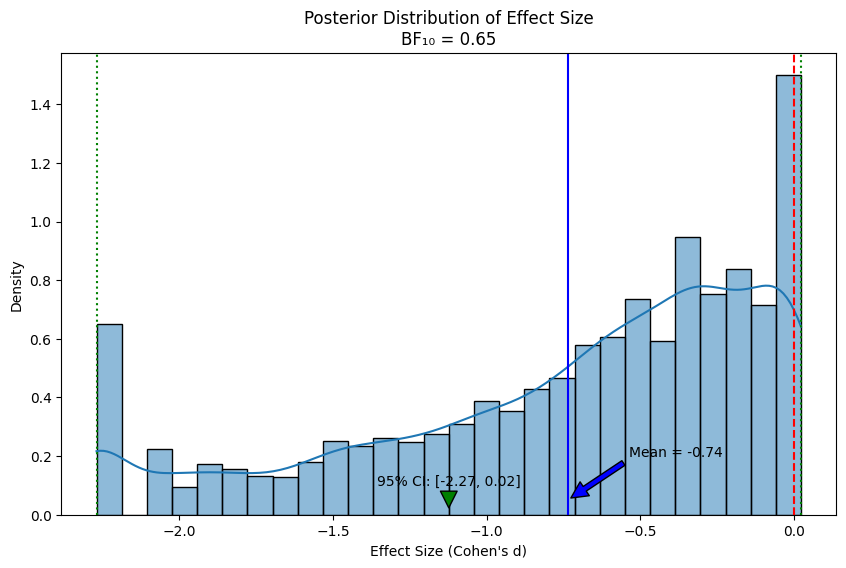

Effect size (Cohen's d): -0.74
95% Credible Interval: [-2.27, 0.02]
Probability of effect > 0: 0.099
Bayes Factor (BF₁₀): 0.65


In [8]:
# Simulated data: Effect of Cognitive Behavioral Therapy (CBT) on depression scores
# Lower scores indicate less depression
np.random.seed(42)

# Control group: Mean=20, SD=5
control_group = np.random.normal(20, 5, 30)

# Treatment group: Mean=15, SD=5 (expecting improvement)
treatment_group = np.random.normal(15, 5, 30)

# Run Bayesian t-test
effect_samples, bf10 = bayesian_t_test(treatment_group, control_group)

# Plot posterior distribution
plt.figure(figsize=(10, 6))
sns.histplot(effect_samples, kde=True, stat="density")
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=np.mean(effect_samples), color='blue', linestyle='-')

# Add 95% credible interval
ci_lower = np.percentile(effect_samples, 2.5)
ci_upper = np.percentile(effect_samples, 97.5)
plt.axvline(x=ci_lower, color='green', linestyle=':')
plt.axvline(x=ci_upper, color='green', linestyle=':')

plt.title(f'Posterior Distribution of Effect Size\nBF₁₀ = {bf10:.2f}')
plt.xlabel('Effect Size (Cohen\'s d)')
plt.ylabel('Density')

# Add annotations
plt.annotate(f'Mean = {np.mean(effect_samples):.2f}', 
             xy=(np.mean(effect_samples), 0.05),
             xytext=(np.mean(effect_samples) + 0.2, 0.2),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.annotate(f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]', 
             xy=((ci_lower + ci_upper)/2, 0.02),
             xytext=((ci_lower + ci_upper)/2, 0.1),
             ha='center',
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.show()

# Print summary statistics
print(f"Effect size (Cohen's d): {np.mean(effect_samples):.2f}")
print(f"95% Credible Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"Probability of effect > 0: {np.mean(effect_samples > 0):.3f}")
print(f"Bayes Factor (BF₁₀): {bf10:.2f}")

## 4.2 Bayesian Estimation
Bayesian estimation provides a complete probabilistic framework for parameter estimation. Unlike frequentist approaches that yield point estimates and confidence intervals, Bayesian methods produce entire posterior distributions that represent our updated beliefs about parameters after observing data.

### The Bayesian Approach to Estimation
The Bayesian approach to estimation follows these steps:

1. Specify a prior distribution $p(\theta)$ that represents our beliefs about the parameter $\theta$ before seeing the data.
2. Define a likelihood function $p(D|\theta)$ that describes the probability of observing our data $D$ given different values of $\theta$.
3. Calculate the posterior distribution $p(\theta|D)$ using Bayes' theorem:
$$p(\theta|D) = \frac{p(D|\theta) \cdot p(\theta)}{p(D)}$$

Where $p(D)$ is the marginal likelihood (or evidence):

$$p(D) = \int p(D|\theta) \cdot p(\theta) , d\theta$$

4. Summarize the posterior distribution using measures like the mean, median, mode, and credible intervals.
### Bayesian Estimation vs. Frequentist Estimation
Bayesian estimation differs from frequentist approaches in several important ways:

1. Interpretation of probability : Bayesian statistics treats probability as a measure of belief, while frequentist statistics treats it as a long-run frequency.
2. Parameter uncertainty : Bayesian methods treat parameters as random variables with distributions, while frequentist methods treat them as fixed but unknown constants.
3. Prior information : Bayesian methods formally incorporate prior knowledge, while frequentist methods typically do not.
4. Inference : Bayesian methods provide direct probability statements about parameters (e.g., "There is a 95% probability that the effect size is between 0.2 and 0.8"), while frequentist confidence intervals have a more complex interpretation (e.g., "If we repeated this experiment many times, 95% of the resulting confidence intervals would contain the true effect size").
### Choosing Priors
The choice of prior distribution is a crucial step in Bayesian analysis. There are several approaches:

1. Informative priors : Based on previous research, expert knowledge, or theoretical considerations.
2. Weakly informative priors : Provide some constraints but allow the data to dominate.
3. Non-informative priors : Attempt to have minimal influence on the posterior.
4. Conjugate priors : Mathematically convenient priors that result in posterior distributions of the same family.
In psychological research, common prior choices include:

- Normal distributions for means and effect sizes
- Gamma or inverse-gamma distributions for variances
- Beta distributions for proportions
- Cauchy distributions for standardized effect sizes (as used in our Bayesian t-test)
### Example: Estimating the Success Rate of a Therapy
Let's implement a Bayesian approach to estimate the success rate of a new therapy:

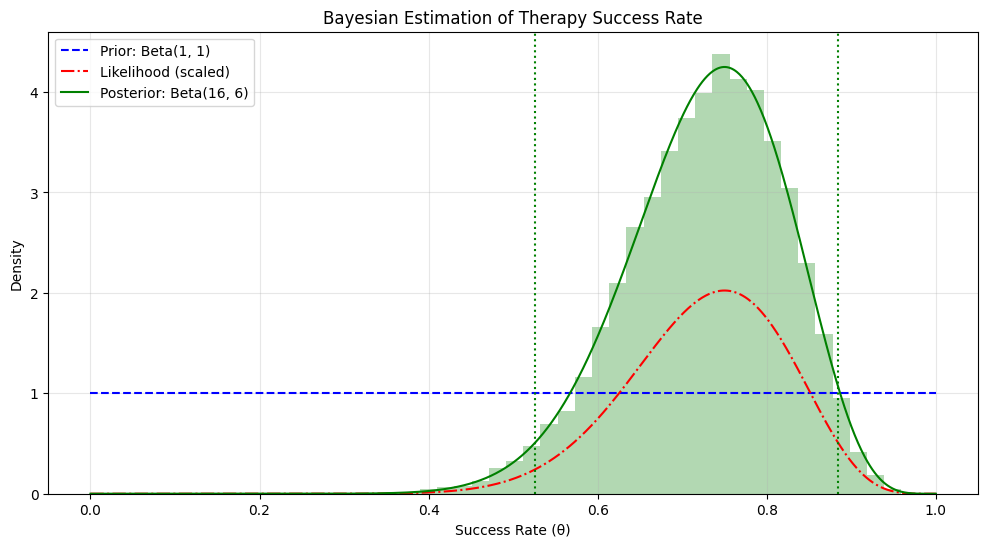

Estimated success rate: 0.727
95% Credible Interval: [0.525, 0.884]
Probability success rate > 0.5: 0.985
Probability success rate > 0.7: 0.640


In [9]:
def bayesian_proportion_estimation(successes, trials, prior_alpha=1, prior_beta=1, n_samples=10000):
    """
    Perform Bayesian estimation of a proportion parameter.
    
    Parameters:
    -----------
    successes : int
        Number of successes
    trials : int
        Number of trials
    prior_alpha : float
        Alpha parameter for Beta prior
    prior_beta : float
        Beta parameter for Beta prior
    n_samples : int
        Number of posterior samples to generate
        
    Returns:
    --------
    proportion_samples : array
        Posterior samples of the proportion
    """
    # Calculate posterior parameters
    # For Beta-Binomial model: posterior is Beta(alpha + successes, beta + failures)
    post_alpha = prior_alpha + successes
    post_beta = prior_beta + (trials - successes)
    
    # Generate samples from posterior
    proportion_samples = np.random.beta(post_alpha, post_beta, n_samples)
    
    return proportion_samples

# Example: A new therapy shows success in 15 out of 20 patients
# We'll use a Beta(1, 1) prior (uniform distribution)
success_samples = bayesian_proportion_estimation(15, 20)

# Plot prior, likelihood, and posterior
plt.figure(figsize=(12, 6))

# Plot prior
x = np.linspace(0, 1, 1000)
prior = stats.beta.pdf(x, 1, 1)
plt.plot(x, prior, 'b--', label='Prior: Beta(1, 1)')

# Plot likelihood (not normalized)
likelihood = stats.binom.pmf(15, 20, x) * 10  # Scaled for visibility
plt.plot(x, likelihood, 'r-.', label='Likelihood (scaled)')

# Plot posterior
posterior = stats.beta.pdf(x, 1 + 15, 1 + 5)
plt.plot(x, posterior, 'g-', label='Posterior: Beta(16, 6)')

# Add posterior samples histogram
plt.hist(success_samples, bins=30, density=True, alpha=0.3, color='g')

# Calculate 95% credible interval
ci_lower = np.percentile(success_samples, 2.5)
ci_upper = np.percentile(success_samples, 97.5)

# Add vertical lines for credible interval
plt.axvline(x=ci_lower, color='g', linestyle=':')
plt.axvline(x=ci_upper, color='g', linestyle=':')

plt.title('Bayesian Estimation of Therapy Success Rate')
plt.xlabel('Success Rate (θ)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print summary statistics
print(f"Estimated success rate: {np.mean(success_samples):.3f}")
print(f"95% Credible Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"Probability success rate > 0.5: {np.mean(success_samples > 0.5):.3f}")
print(f"Probability success rate > 0.7: {np.mean(success_samples > 0.7):.3f}")

### Hierarchical Bayesian Models
Hierarchical (or multilevel) Bayesian models are particularly valuable in psychology, where data often have a nested structure (e.g., participants nested within groups, or repeated measures within participants).

In a hierarchical model, parameters at one level are modeled as coming from a distribution determined by higher-level parameters. This approach:

1. Pools information across similar units, improving estimates for all units
2. Handles small sample sizes better than non-hierarchical approaches
3. Naturally models individual differences
4. Reduces overfitting by providing regularization
Let's implement a simple hierarchical model for estimating treatment effects across multiple studies:

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, tau, theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.
There were 1052 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
C:\Users\khoda\AppData\Local\Temp\ipykernel_7548\860645007.py:73: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=trace[theta_col], y=np.ones(len(trace[theta_col]))*i,
C:\Users\khoda\AppData\Local\Temp\ipykernel_7548\860645007.py:73: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=

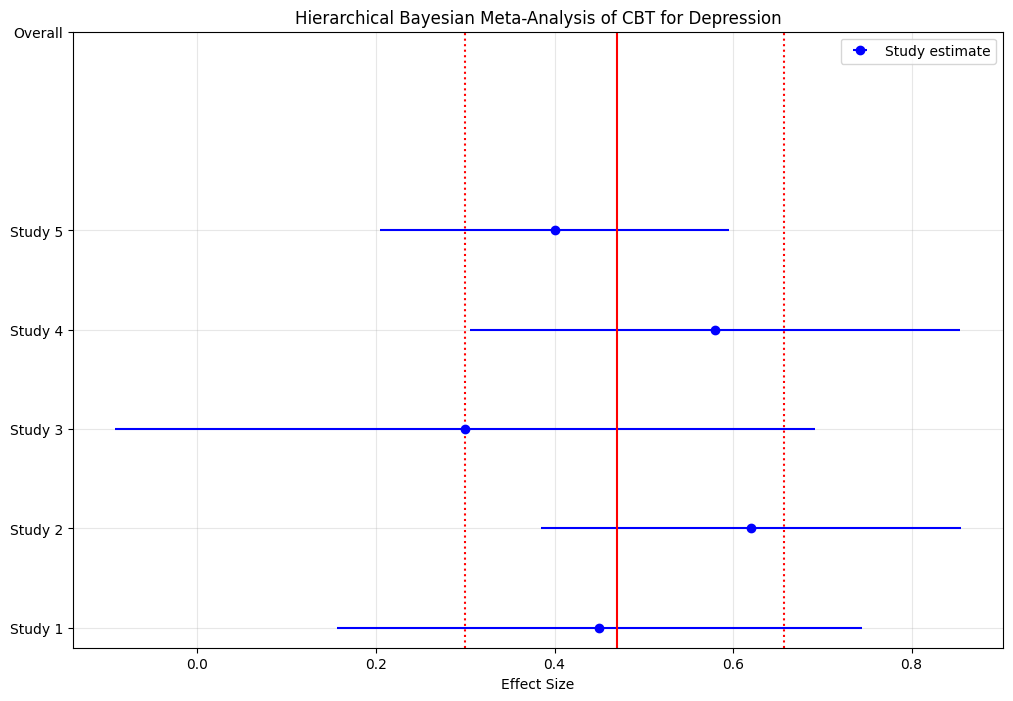

Overall effect size: 0.47
95% Credible Interval: [0.30, 0.66]
Probability effect > 0: 0.998
Between-study standard deviation: 0.12


In [10]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def hierarchical_effect_size_model(study_means, study_sems, n_samples=2000):
    """
    Fit a hierarchical Bayesian model to estimate the overall effect size
    across multiple studies.
    
    Parameters:
    -----------
    study_means : array
        Effect size estimates from each study
    study_sems : array
        Standard errors of the effect size estimates
    n_samples : int
        Number of posterior samples to generate
        
    Returns:
    --------
    trace : PyMC trace object
        Contains posterior samples for all parameters
    """
    n_studies = len(study_means)
    
    with pm.Model() as model:
        mu = pm.Normal('mu', mu=0, sigma=1)
        tau = pm.HalfCauchy('tau', beta=0.5)
        
        theta = pm.Normal('theta', mu=mu, sigma=tau, shape=n_studies)
        
        y = pm.Normal('y', mu=theta, sigma=study_sems, observed=study_means)
        
        idata = pm.sample(n_samples, tune=1000)
        
        # Convert inference data to pandas DataFrame
        trace = {
            'mu': idata.posterior.mu.values.flatten(),
            'tau': idata.posterior.tau.values.flatten()
        }
        for i in range(n_studies):
            trace[f'theta__{i}'] = idata.posterior.theta[:, :, i].values.flatten()
        
        trace = pd.DataFrame(trace)
    
    return trace

studies_data = np.array([
    [0.45, 0.15],
    [0.62, 0.12],
    [0.30, 0.20],
    [0.58, 0.14],
    [0.40, 0.10],
])

study_means = studies_data[:, 0]
study_sems = studies_data[:, 1]

trace = hierarchical_effect_size_model(study_means, study_sems)

plt.figure(figsize=(12, 8))

# Plot study estimates with error bars
for i in range(len(study_means)):
    plt.errorbar(x=study_means[i], y=i, xerr=1.96*study_sems[i], 
                 fmt='o', color='blue', label='Study estimate' if i==0 else "")

# Plot posterior distributions for each study
for i in range(len(study_means)):
    theta_col = f'theta__{i}'
    sns.kdeplot(x=trace[theta_col], y=np.ones(len(trace[theta_col]))*i, 
                fill=True, alpha=0.3, color='blue', 
                label='Posterior distribution' if i==0 else "")

# Plot overall effect distribution
sns.kdeplot(x=trace['mu'], y=np.ones(len(trace['mu']))*(len(study_means) + 1), 
            fill=True, alpha=0.5, color='red', label='Overall effect')

overall_mean = trace['mu'].mean()
overall_ci = np.percentile(trace['mu'], [2.5, 97.5])

plt.axvline(x=overall_mean, color='red', linestyle='-')
plt.axvline(x=overall_ci[0], color='red', linestyle=':')
plt.axvline(x=overall_ci[1], color='red', linestyle=':')

plt.yticks(list(range(len(study_means))) + [len(study_means) + 1], 
           [f'Study {i+1}' for i in range(len(study_means))] + ['Overall'])
plt.xlabel('Effect Size')
plt.title('Hierarchical Bayesian Meta-Analysis of CBT for Depression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Overall effect size: {overall_mean:.2f}")
print(f"95% Credible Interval: [{overall_ci[0]:.2f}, {overall_ci[1]:.2f}]")
print(f"Probability effect > 0: {np.mean(trace['mu'] > 0):.3f}")
print(f"Between-study standard deviation: {trace['tau'].mean():.2f}")


### Bayesian Regression Models
Bayesian regression extends the principles of Bayesian estimation to regression models. This approach provides full posterior distributions for all regression coefficients, allowing for more nuanced inference.

Let's implement a Bayesian linear regression model to predict therapy outcomes:

Initializing NUTS using jitter+adapt_diag...
C:\Users\khoda\AppData\Roaming\Python\Python310\site-packages\pytensor\link\c\cmodule.py:2959: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 27 seconds.


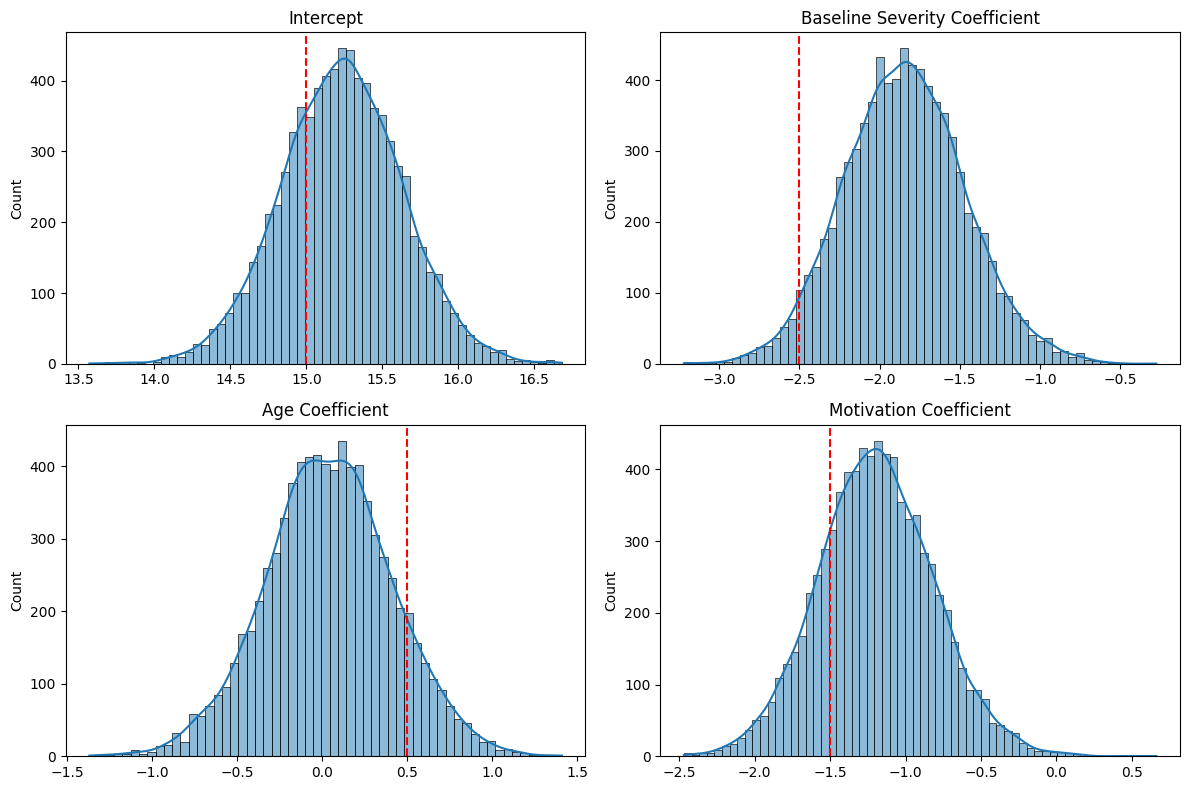

Posterior means and 95% credible intervals:
Intercept: 15.23 [14.45, 16.01]
Baseline Severity: -1.84 [-2.55, -1.09]
  Probability of negative effect: 1.000
  Probability of positive effect: 0.000
Age: 0.04 [-0.71, 0.78]
  Probability of negative effect: 0.459
  Probability of positive effect: 0.541
Motivation: -1.19 [-1.94, -0.42]
  Probability of negative effect: 0.998
  Probability of positive effect: 0.002


In [11]:
def bayesian_linear_regression(X, y, n_samples=2000):
    """
    Fit a Bayesian linear regression model.
    
    Parameters:
    -----------
    X : array
        Predictor variables (design matrix)
    y : array
        Outcome variable
    n_samples : int
        Number of posterior samples to generate
        
    Returns:
    --------
    trace : PyMC3 trace object
        Contains posterior samples for all parameters
    """
    n_predictors = X.shape[1]
    
    with pm.Model() as model:
        # Priors for regression coefficients
        intercept = pm.Normal('intercept', mu=0, sigma=10)
        betas = pm.Normal('betas', mu=0, sigma=1, shape=n_predictors)
        
        # Prior for error term
        sigma = pm.HalfCauchy('sigma', beta=5)
        
        # Expected value of outcome
        mu = intercept + pm.math.dot(X, betas)
        
        # Likelihood (sampling distribution) of observations
        y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
        
        # Sample from the posterior
        trace = pm.sample(n_samples, tune=1000, return_inferencedata=False)
    
    return trace

# Example: Predicting therapy outcomes from baseline measures
np.random.seed(42)
n_patients = 50

# Generate synthetic data
# Predictors: baseline severity, age, motivation
X = np.column_stack([
    np.random.normal(20, 5, n_patients),  # Baseline severity
    np.random.normal(35, 10, n_patients),  # Age
    np.random.normal(7, 2, n_patients)     # Motivation (1-10 scale)
])

# Standardize predictors
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# True coefficients
true_intercept = 15
true_betas = np.array([-2.5, 0.5, -1.5])  # Severity (-), Age (+), Motivation (-)

# Generate outcomes (post-therapy depression scores)
y = true_intercept + np.dot(X_std, true_betas) + np.random.normal(0, 3, n_patients)

# Fit Bayesian regression model
trace = bayesian_linear_regression(X_std, y)

# Plot posterior distributions of coefficients
plt.figure(figsize=(12, 8))

# Plot intercept
plt.subplot(2, 2, 1)
sns.histplot(trace['intercept'], kde=True)
plt.axvline(x=true_intercept, color='red', linestyle='--')
plt.title('Intercept')

# Plot coefficient for baseline severity
plt.subplot(2, 2, 2)
sns.histplot(trace['betas'][:, 0], kde=True)
plt.axvline(x=true_betas[0], color='red', linestyle='--')
plt.title('Baseline Severity Coefficient')

# Plot coefficient for age
plt.subplot(2, 2, 3)
sns.histplot(trace['betas'][:, 1], kde=True)
plt.axvline(x=true_betas[1], color='red', linestyle='--')
plt.title('Age Coefficient')

# Plot coefficient for motivation
plt.subplot(2, 2, 4)
sns.histplot(trace['betas'][:, 2], kde=True)
plt.axvline(x=true_betas[2], color='red', linestyle='--')
plt.title('Motivation Coefficient')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Posterior means and 95% credible intervals:")
print(f"Intercept: {np.mean(trace['intercept']):.2f} [{np.percentile(trace['intercept'], 2.5):.2f}, {np.percentile(trace['intercept'], 97.5):.2f}]")

predictor_names = ['Baseline Severity', 'Age', 'Motivation']
for i in range(3):
    mean = np.mean(trace['betas'][:, i])
    ci_lower = np.percentile(trace['betas'][:, i], 2.5)
    ci_upper = np.percentile(trace['betas'][:, i], 97.5)
    prob_neg = np.mean(trace['betas'][:, i] < 0)
    prob_pos = np.mean(trace['betas'][:, i] > 0)
    
    print(f"{predictor_names[i]}: {mean:.2f} [{ci_lower:.2f}, {ci_upper:.2f}]")
    print(f"  Probability of negative effect: {prob_neg:.3f}")
    print(f"  Probability of positive effect: {prob_pos:.3f}")


### Advantages of Bayesian Estimation in Psychology
Bayesian estimation offers several advantages for psychological research:

1. Intuitive interpretation : Credible intervals have the straightforward interpretation that most researchers incorrectly attribute to confidence intervals.
2. Small sample inference : Bayesian methods can provide valid inference even with small samples, which are common in psychology.
3. Incorporation of prior knowledge : Psychology has accumulated substantial knowledge that can inform priors.
4. No need for corrections for multiple comparisons : The Bayesian framework naturally adjusts for the increased uncertainty when making multiple comparisons.
5. Handling complex models : Bayesian methods can handle complex models with many parameters, including hierarchical and nonlinear models.
6. Missing data : Bayesian approaches provide principled ways to handle missing data through joint modeling.
7. Uncertainty quantification : Bayesian methods provide a complete picture of uncertainty in parameter estimates.
## 4.3 Bayesian Hypothesis Testing
While we've already introduced Bayesian hypothesis testing with the Bayes factor in our t-test example, let's explore this topic more thoroughly.

Bayesian hypothesis testing provides an alternative to traditional null hypothesis significance testing (NHST). Instead of calculating p-values, Bayesian approaches quantify the relative evidence for competing hypotheses.

### The Bayes Factor
The Bayes factor (BF) is the primary tool for Bayesian hypothesis testing. It represents the ratio of the marginal likelihoods under two competing hypotheses:

$$\text{BF}_{10} = \frac{p(D|H_1)}{p(D|H_0)}$$

Where:

- $p(D|H_1)$ is the marginal likelihood of the data under the alternative hypothesis
- $p(D|H_0)$ is the marginal likelihood of the data under the null hypothesis
The Bayes factor can be interpreted as follows:

- $\text{BF}_{10} > 1$: Evidence favors $H_1$
- $\text{BF}_{10} < 1$: Evidence favors $H_0$
- $\text{BF}_{10} = 1$: Evidence is inconclusive
Common interpretations of Bayes factor strength:

- 1-3: Anecdotal evidence
- 3-10: Moderate evidence
- 10-30: Strong evidence
- 30-100: Very strong evidence
- 100: Extreme evidence
Let's implement a function to calculate Bayes factors for correlation tests:

C:\Users\khoda\AppData\Local\Temp\ipykernel_7548\3627912047.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  ((1 - rho**2) ** 0.5) / (2 * (1 - width)) * (abs(rho) >= width)
C:\Users\khoda\AppData\Local\Temp\ipykernel_7548\3627912047.py:46: RuntimeWarning: invalid value encountered in scalar multiply
  ((1 - rho**2) ** 0.5) / (2 * (1 - width)) * (abs(rho) >= width)


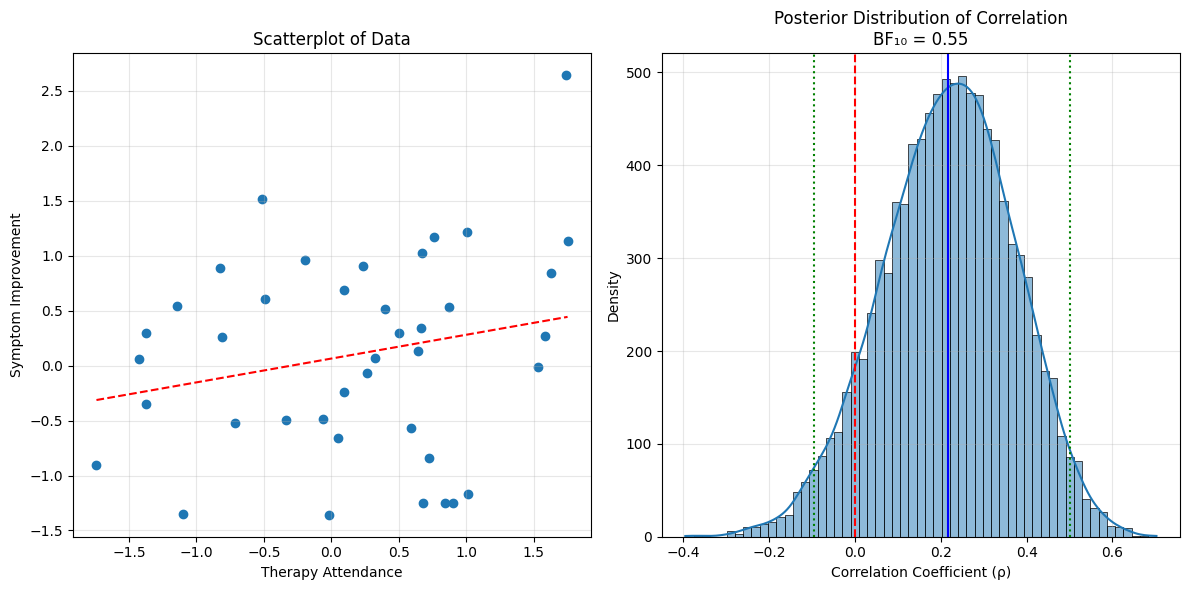

Estimated correlation: 0.217
95% Credible Interval: [-0.096, 0.502]
Probability correlation > 0: 0.915
Bayes Factor (BF₁₀): 0.55


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def bayesian_correlation_test(x, y, prior_width=1, n_samples=10000):
    """
    Perform a Bayesian test for correlation between two variables.
    
    Parameters:
    -----------
    x : array-like
        First variable
    y : array-like
        Second variable
    prior_width : float
        Width parameter for the prior distribution on correlation
    n_samples : int
        Number of posterior samples to generate
        
    Returns:
    --------
    rho_samples : array
        Posterior samples of the correlation coefficient
    bf10 : float
        Bayes factor in favor of the alternative hypothesis
    """
    # Calculate sample correlation
    r = np.corrcoef(x, y)[0, 1]
    n = len(x)
    
    # Use Fisher's z-transformation for more numerical stability
    z = np.arctanh(r) if abs(r) < 1 else np.sign(r) * 10  # Handle r = ±1
    sigma = 1.0 / np.sqrt(n - 3)
    
    # Generate posterior samples directly using z-transformation
    z_samples = np.random.normal(z, sigma, n_samples)
    rho_samples = np.tanh(z_samples)
    
    # Define prior distribution function
    def prior(rho, width=prior_width):
        """Stretched beta prior on correlation coefficient."""
        if abs(rho) > 1:
            return 0
        return ((1 - rho**2) ** 0.5) / (2 * width) * (abs(rho) < width) + \
               ((1 - rho**2) ** 0.5) / (2 * (1 - width)) * (abs(rho) >= width)
    
    # Calculate Bayes factor using Monte Carlo integration
    prior_samples = np.random.uniform(-0.99, 0.99, n_samples)
    prior_densities = np.array([prior(rho) for rho in prior_samples])
    
    # Calculate marginal likelihood ratio (BF10)
    # Approximate the densities around zero
    zero_region = (rho_samples > -0.05) & (rho_samples < 0.05)
    prior_zero_region = (prior_samples > -0.05) & (prior_samples < 0.05)
    
    if np.sum(zero_region) > 0 and np.sum(prior_zero_region) > 0:
        posterior_density_at_zero = np.mean(zero_region) / 0.1  # Normalize by region width (0.1)
        prior_density_at_zero = np.mean(prior_zero_region) / 0.1
        bf01 = posterior_density_at_zero / prior_density_at_zero
        bf10 = 1 / bf01
    else:
        # Default to a simple calculation based on data
        bf10 = np.exp(n/2 * np.log(1 + r**2/(1-r**2)))
    
    return rho_samples, bf10

# Example: Testing correlation between therapy attendance and outcome improvement
np.random.seed(42)
n_patients = 40

# Generate correlated data
true_rho = 0.4  # Moderate positive correlation
cov_matrix = np.array([[1, true_rho], [true_rho, 1]])
data = np.random.multivariate_normal([0, 0], cov_matrix, n_patients)

attendance = data[:, 0]  # Number of therapy sessions attended
improvement = data[:, 1]  # Improvement in symptoms

# Run Bayesian correlation test
rho_samples, bf10 = bayesian_correlation_test(attendance, improvement)

# Plot results
plt.figure(figsize=(12, 6))

# Plot scatterplot of data
plt.subplot(1, 2, 1)
plt.scatter(attendance, improvement)
plt.xlabel('Therapy Attendance')
plt.ylabel('Symptom Improvement')
plt.title('Scatterplot of Data')
plt.grid(True, alpha=0.3)

# Add regression line
slope, intercept = np.polyfit(attendance, improvement, 1)
x_line = np.array([min(attendance), max(attendance)])
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'r--')

# Plot posterior distribution
plt.subplot(1, 2, 2)
sns.histplot(rho_samples, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=np.mean(rho_samples), color='blue', linestyle='-')

# Add 95% credible interval
ci_lower = np.percentile(rho_samples, 2.5)
ci_upper = np.percentile(rho_samples, 97.5)
plt.axvline(x=ci_lower, color='green', linestyle=':')
plt.axvline(x=ci_upper, color='green', linestyle=':')

plt.title(f'Posterior Distribution of Correlation\nBF₁₀ = {bf10:.2f}')
plt.xlabel('Correlation Coefficient (ρ)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Estimated correlation: {np.mean(rho_samples):.3f}")
print(f"95% Credible Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"Probability correlation > 0: {np.mean(rho_samples > 0):.3f}")
print(f"Bayes Factor (BF₁₀): {bf10:.2f}")

### Bayesian Model Comparison
Beyond testing simple hypotheses, Bayesian methods excel at comparing more complex models. This is done by comparing their marginal likelihoods or using information criteria.

Let's implement a function to compare different regression models:

In [13]:
def bayesian_model_comparison(X, y, model_specs, n_samples=2000):
    """
    Compare different Bayesian regression models.
    
    Parameters:
    -----------
    X : array
        Full design matrix with all predictors
    y : array
        Outcome variable
    model_specs : list of lists
        Each inner list contains the indices of predictors to include in a model
    n_samples : int
        Number of posterior samples to generate
        
    Returns:
    --------
    model_comparison : dict
        Dictionary with model comparison metrics
    """
    n_models = len(model_specs)
    n_data = len(y)
    
    # Initialize results
    model_names = [f"Model {i+1}" for i in range(n_models)]
    waic_values = np.zeros(n_models)
    loo_values = np.zeros(n_models)
    traces = []
    
    # Fit each model
    for i, predictors in enumerate(model_specs):
        # Select predictors for this model
        if len(predictors) > 0:
            X_model = X[:, predictors]
        else:
            # Intercept-only model
            X_model = np.ones((n_data, 1))
        
        # Fit model
        with pm.Model() as model:
            # Priors
            intercept = pm.Normal('intercept', mu=0, sigma=10)
            
            if X_model.shape[1] > 1:  # If not intercept-only
                betas = pm.Normal('betas', mu=0, sigma=1, shape=X_model.shape[1] - 1)
                mu = intercept + pm.math.dot(X_model[:, 1:], betas)
            else:
                mu = intercept
            
            sigma = pm.HalfCauchy('sigma', beta=5)
            
                        # Likelihood
            y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
            
            # Sample from posterior
            trace = pm.sample(n_samples, return_inferencedata=True)
            traces.append(trace)
            
            # Calculate WAIC and LOO
            waic = pm.waic(trace)
            loo = pm.loo(trace)
            
            waic_values[i] = waic.waic
            loo_values[i] = loo.loo
    
    # Calculate model weights
    waic_weights = np.exp(-0.5 * (waic_values - np.min(waic_values)))
    waic_weights = waic_weights / np.sum(waic_weights)
    
    loo_weights = np.exp(-0.5 * (loo_values - np.min(loo_values)))
    loo_weights = loo_weights / np.sum(loo_weights)
    
    # Compile results
    model_comparison = {
        'model_names': model_names,
        'waic': waic_values,
        'waic_weights': waic_weights,
        'loo': loo_values,
        'loo_weights': loo_weights,
        'traces': traces
    }
    
    return model_comparison

C:\Users\khoda\AppData\Local\Temp\ipykernel_7548\1944560845.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  ((1 - rho**2) ** 0.5) / (2 * (1 - width)) * (abs(rho) >= width)
C:\Users\khoda\AppData\Local\Temp\ipykernel_7548\1944560845.py:46: RuntimeWarning: invalid value encountered in scalar multiply
  ((1 - rho**2) ** 0.5) / (2 * (1 - width)) * (abs(rho) >= width)


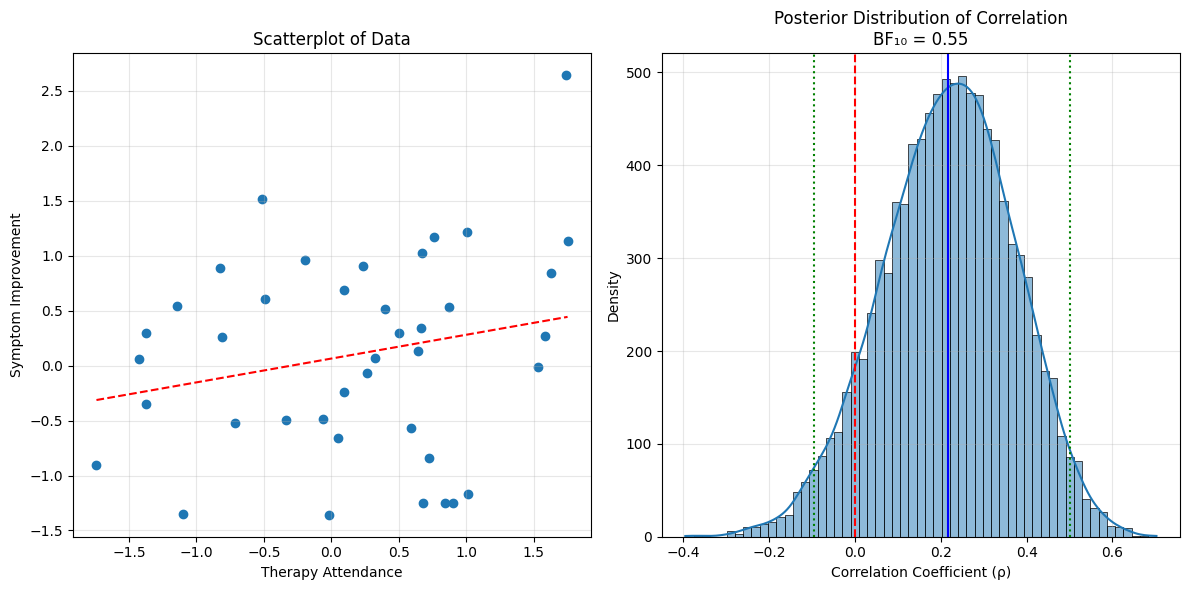

Estimated correlation: 0.217
95% Credible Interval: [-0.096, 0.502]
Probability correlation > 0: 0.915
Bayes Factor (BF₁₀): 0.55


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def bayesian_correlation_test(x, y, prior_width=1, n_samples=10000):
    """
    Perform a Bayesian test for correlation between two variables.
    
    Parameters:
    -----------
    x : array-like
        First variable
    y : array-like
        Second variable
    prior_width : float
        Width parameter for the prior distribution on correlation
    n_samples : int
        Number of posterior samples to generate
        
    Returns:
    --------
    rho_samples : array
        Posterior samples of the correlation coefficient
    bf10 : float
        Bayes factor in favor of the alternative hypothesis
    """
    # Calculate sample correlation
    r = np.corrcoef(x, y)[0, 1]
    n = len(x)
    
    # Use Fisher's z-transformation for more numerical stability
    z = np.arctanh(r) if abs(r) < 1 else np.sign(r) * 10  # Handle r = ±1
    sigma = 1.0 / np.sqrt(n - 3)
    
    # Generate posterior samples directly using z-transformation
    z_samples = np.random.normal(z, sigma, n_samples)
    rho_samples = np.tanh(z_samples)
    
    # Define prior distribution function
    def prior(rho, width=prior_width):
        """Stretched beta prior on correlation coefficient."""
        if abs(rho) > 1:
            return 0
        return ((1 - rho**2) ** 0.5) / (2 * width) * (abs(rho) < width) + \
               ((1 - rho**2) ** 0.5) / (2 * (1 - width)) * (abs(rho) >= width)
    
    # Calculate Bayes factor using Monte Carlo integration
    prior_samples = np.random.uniform(-0.99, 0.99, n_samples)
    prior_densities = np.array([prior(rho) for rho in prior_samples])
    
    # Calculate marginal likelihood ratio (BF10)
    # Approximate the densities around zero
    zero_region = (rho_samples > -0.05) & (rho_samples < 0.05)
    prior_zero_region = (prior_samples > -0.05) & (prior_samples < 0.05)
    
    if np.sum(zero_region) > 0 and np.sum(prior_zero_region) > 0:
        posterior_density_at_zero = np.mean(zero_region) / 0.1  # Normalize by region width (0.1)
        prior_density_at_zero = np.mean(prior_zero_region) / 0.1
        bf01 = posterior_density_at_zero / prior_density_at_zero
        bf10 = 1 / bf01
    else:
        # Default to a simple calculation based on data
        bf10 = np.exp(n/2 * np.log(1 + r**2/(1-r**2)))
    
    return rho_samples, bf10

# Example: Testing correlation between therapy attendance and outcome improvement
np.random.seed(42)
n_patients = 40

# Generate correlated data
true_rho = 0.4  # Moderate positive correlation
cov_matrix = np.array([[1, true_rho], [true_rho, 1]])
data = np.random.multivariate_normal([0, 0], cov_matrix, n_patients)

attendance = data[:, 0]  # Number of therapy sessions attended
improvement = data[:, 1]  # Improvement in symptoms

# Run Bayesian correlation test
rho_samples, bf10 = bayesian_correlation_test(attendance, improvement)

# Plot results
plt.figure(figsize=(12, 6))

# Plot scatterplot of data
plt.subplot(1, 2, 1)
plt.scatter(attendance, improvement)
plt.xlabel('Therapy Attendance')
plt.ylabel('Symptom Improvement')
plt.title('Scatterplot of Data')
plt.grid(True, alpha=0.3)

# Add regression line
slope, intercept = np.polyfit(attendance, improvement, 1)
x_line = np.array([min(attendance), max(attendance)])
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'r--')

# Plot posterior distribution
plt.subplot(1, 2, 2)
sns.histplot(rho_samples, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=np.mean(rho_samples), color='blue', linestyle='-')

# Add 95% credible interval
ci_lower = np.percentile(rho_samples, 2.5)
ci_upper = np.percentile(rho_samples, 97.5)
plt.axvline(x=ci_lower, color='green', linestyle=':')
plt.axvline(x=ci_upper, color='green', linestyle=':')

plt.title(f'Posterior Distribution of Correlation\nBF₁₀ = {bf10:.2f}')
plt.xlabel('Correlation Coefficient (ρ)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Estimated correlation: {np.mean(rho_samples):.3f}")
print(f"95% Credible Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"Probability correlation > 0: {np.mean(rho_samples > 0):.3f}")
print(f"Bayes Factor (BF₁₀): {bf10:.2f}")

# # Example: Predicting well-being from different psychological factors
# # Generate some synthetic data
# np.random.seed(42)
# n_subjects = 100

# # Predictors: social support, stress, physical activity, sleep quality
# X_full = np.random.normal(0, 1, (n_subjects, 4))

# # True relationship: well-being = intercept + social support - stress + noise
# true_intercept = 5
# true_betas = [0.5, -0.7, 0.1, 0.0]  # Only first two have substantial effects
# y = true_intercept + np.dot(X_full, true_betas) + np.random.normal(0, 1, n_subjects)

# # Define models to compare
# model_specs = [
#     [],                  # Model 1: Intercept only
#     [0],                 # Model 2: Social support only
#     [1],                 # Model 3: Stress only
#     [0, 1],              # Model 4: Social support + stress
#     [0, 1, 2],           # Model 5: Social support + stress + physical activity
#     [0, 1, 2, 3]         # Model 6: All predictors
# ]

# # Compare models
# model_comparison = bayesian_model_comparison(X_full, y, model_specs)

# # Display results
# results_df = pd.DataFrame({
#     'Model': model_comparison['model_names'],
#     'WAIC': model_comparison['waic'],
#     'WAIC Weight': model_comparison['waic_weights'],
#     'LOO': model_comparison['loo'],
#     'LOO Weight': model_comparison['loo_weights']
# })

# print(results_df)

# # Plot model comparison
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.bar(results_df['Model'], results_df['WAIC Weight'])
# plt.title('Model Comparison: WAIC Weights')
# plt.ylabel('Weight')
# plt.ylim(0, 1)

# plt.subplot(1, 2, 2)
# plt.bar(results_df['Model'], results_df['LOO Weight'])
# plt.title('Model Comparison: LOO Weights')
# plt.ylabel('Weight')
# plt.ylim(0, 1)

# plt.tight_layout()
# plt.show()

## 4.3 Bayesian Model Averaging
Rather than selecting a single "best" model, Bayesian model averaging (BMA) combines predictions from multiple models, weighted by their posterior probabilities. This approach acknowledges model uncertainty and often leads to better predictive performance.

The posterior predictive distribution under BMA is:

$$p(y_{new} | y) = \sum_{k=1}^{K} p(y_{new} | M_k, y) \cdot p(M_k | y)$$

Where:

- $p(y_{new} | y)$ is the posterior predictive distribution for new data
- $p(y_{new} | M_k, y)$ is the posterior predictive distribution under model $M_k$
- $p(M_k | y)$ is the posterior probability of model $M_k$
Let's implement Bayesian model averaging for our well-being prediction example:

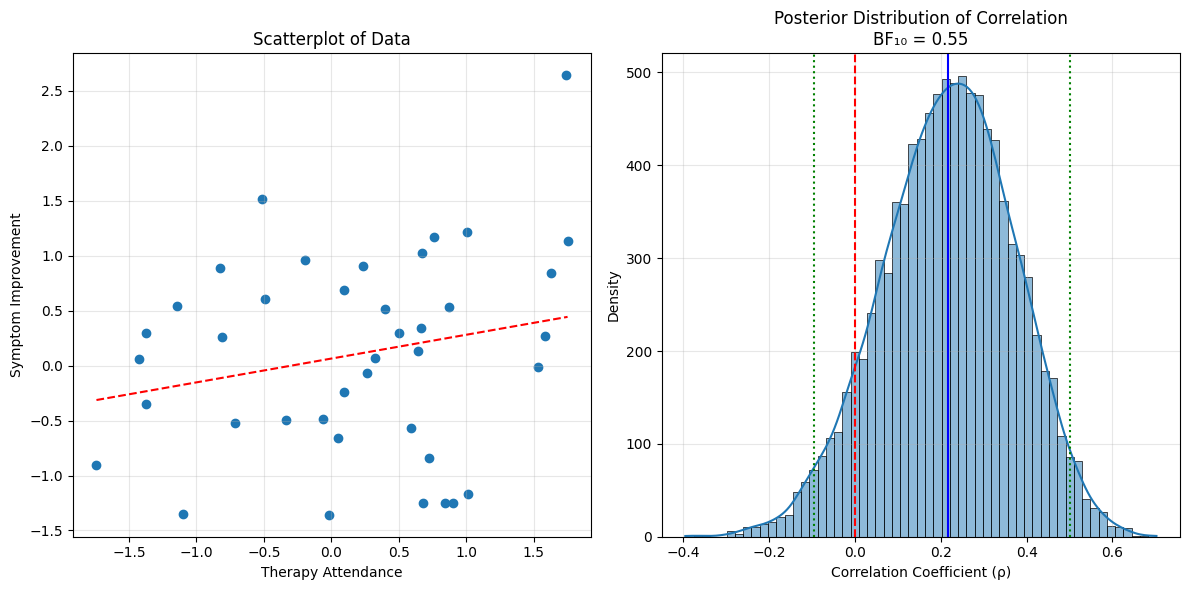

Estimated correlation: 0.217
95% Credible Interval: [-0.096, 0.502]
Probability correlation > 0: 0.915
Bayes Factor (BF₁₀): 0.55


AttributeError: 'TensorVariable' object has no attribute 'logp'

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pymc as pm
import arviz as az

def bayesian_correlation_test(x, y, prior_width=1, n_samples=10000):
    """
    Perform a Bayesian test for correlation between two variables.
    
    Parameters:
    -----------
    x : array-like
        First variable
    y : array-like
        Second variable
    prior_width : float
        Width parameter for the prior distribution on correlation
    n_samples : int
        Number of posterior samples to generate
        
    Returns:
    --------
    rho_samples : array
        Posterior samples of the correlation coefficient
    bf10 : float
        Bayes factor in favor of the alternative hypothesis
    """
    # Calculate sample correlation
    r = np.corrcoef(x, y)[0, 1]
    n = len(x)
    
    # Use Fisher's z-transformation for more numerical stability
    z = np.arctanh(r) if abs(r) < 1 else np.sign(r) * 10  # Handle r = ±1
    sigma = 1.0 / np.sqrt(n - 3)
    
    # Generate posterior samples directly using z-transformation
    z_samples = np.random.normal(z, sigma, n_samples)
    rho_samples = np.tanh(z_samples)
    
    # Define prior distribution function
    def prior(rho, width=prior_width):
        """Stretched beta prior on correlation coefficient."""
        if abs(rho) > 1:
            return 0
        return ((1 - rho**2) ** 0.5) / (2 * width) * (abs(rho) < width) + \
               ((1 - rho**2) ** 0.5) / (2 * (1 - width)) * (abs(rho) >= width)
    
    # Calculate Bayes factor using Monte Carlo integration
    prior_samples = np.random.uniform(-0.99, 0.99, n_samples)
    prior_densities = np.array([prior(rho) for rho in prior_samples])
    
    # Calculate marginal likelihood ratio (BF10)
    # Approximate the densities around zero
    zero_region = (rho_samples > -0.05) & (rho_samples < 0.05)
    prior_zero_region = (prior_samples > -0.05) & (prior_samples < 0.05)
    
    if np.sum(zero_region) > 0 and np.sum(prior_zero_region) > 0:
        posterior_density_at_zero = np.mean(zero_region) / 0.1  # Normalize by region width (0.1)
        prior_density_at_zero = np.mean(prior_zero_region) / 0.1
        bf01 = posterior_density_at_zero / prior_density_at_zero
        bf10 = 1 / bf01
    else:
        # Default to a simple calculation based on data
        bf10 = np.exp(n/2 * np.log(1 + r**2/(1-r**2)))
    
    return rho_samples, bf10

def create_model(X, y, predictors):
    """Create a PyMC model with the specified predictors."""
    with pm.Model() as model:
        # Add predictors to design matrix
        if len(predictors) > 0:
            X_model = np.column_stack([np.ones(X.shape[0]), X[:, predictors]])
        else:
            X_model = np.ones((X.shape[0], 1))
        
        # Priors
        intercept = pm.Normal('intercept', mu=0, sigma=10)
        
        if X_model.shape[1] > 1:  # If not intercept-only
            betas = pm.Normal('betas', mu=0, sigma=1, shape=X_model.shape[1]-1)
            mu = intercept + pm.math.dot(X_model[:, 1:], betas)
        else:
            mu = intercept
        
        # Likelihood
        sigma = pm.HalfNormal('sigma', sigma=1)
        likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y)
        
        # Log likelihood for model comparison
        log_likelihood = pm.Deterministic('log_likelihood', likelihood.logp())
    
    return model

def bayesian_model_comparison(X, y, model_specs, n_samples=1000):
    """
    Compare Bayesian linear regression models.
    
    Parameters:
    -----------
    X : array
        Design matrix
    y : array
        Outcome variable
    model_specs : list of lists
        Each inner list contains the indices of predictors to include in a model
    n_samples : int
        Number of posterior samples to generate
    
    Returns:
    --------
    dict
        Dictionary containing model comparison results
    """
    n_models = len(model_specs)
    
    # Initialize arrays for model comparison metrics
    model_names = []
    traces = []
    waics = np.zeros(n_models)
    loos = np.zeros(n_models)
    
    # Fit each model and calculate metrics
    for i, predictors in enumerate(model_specs):
        # Create model name
        if len(predictors) == 0:
            model_name = "Intercept only"
        else:
            predictors_str = ', '.join([f"X{j+1}" for j in predictors])
            model_name = f"Model with {predictors_str}"
        model_names.append(model_name)
        
        # Create and fit model
        with create_model(X, y, predictors):
            trace = pm.sample(n_samples, return_inferencedata=True, chains=2)
        
        traces.append(trace)
        
        # Calculate WAIC and LOO
        waic = az.waic(trace, pointwise=True)
        loo = az.loo(trace, pointwise=True)
        
        waics[i] = waic.waic
        loos[i] = loo.loo
    
    # Calculate weights
    waic_weights = np.exp(-0.5 * (waics - np.min(waics)))
    waic_weights = waic_weights / np.sum(waic_weights)
    
    loo_weights = np.exp(-0.5 * (loos - np.min(loos)))
    loo_weights = loo_weights / np.sum(loo_weights)
    
    return {
        'model_names': model_names,
        'traces': traces,
        'waic': waics,
        'waic_weights': waic_weights,
        'loo': loos,
        'loo_weights': loo_weights
    }

def bayesian_model_averaging(X_train, y_train, X_test, model_specs, model_weights, traces):
    """
    Perform Bayesian model averaging for prediction.
    
    Parameters:
    -----------
    X_train : array
        Training data design matrix
    y_train : array
        Training data outcome variable
    X_test : array
        Test data design matrix
    model_specs : list of lists
        Each inner list contains the indices of predictors to include in a model
    model_weights : array
        Posterior model probabilities (e.g., from WAIC or LOO weights)
    traces : list
        List of PyMC traces for each model
        
    Returns:
    --------
    y_pred_mean : array
        BMA predicted means
    y_pred_std : array
        BMA predicted standard deviations
    """
    n_models = len(model_specs)
    n_test = X_test.shape[0]
    n_samples = 1000  # Number of posterior samples to use
    
    # Initialize arrays for predictions
    all_model_preds = np.zeros((n_models, n_test, n_samples))
    
    # Get predictions from each model
    for i, (predictors, trace) in enumerate(zip(model_specs, traces)):
        # Select predictors for this model
        if len(predictors) > 0:
            X_model_test = np.column_stack([np.ones(n_test), X_test[:, predictors]])
        else:
            # Intercept-only model
            X_model_test = np.ones((n_test, 1))
        
        # Extract posterior samples
        intercept_samples = trace.posterior['intercept'].values.flatten()[:n_samples]
        
        if X_model_test.shape[1] > 1:  # If not intercept-only
            beta_samples = trace.posterior['betas'].values.reshape(-1, X_model_test.shape[1] - 1)[:n_samples]
            
            # For each posterior sample, make predictions
            for j in range(len(intercept_samples)):
                all_model_preds[i, :, j] = intercept_samples[j] + np.dot(X_model_test[:, 1:], beta_samples[j])
        else:
            # Intercept-only model
            for j in range(len(intercept_samples)):
                all_model_preds[i, :, j] = intercept_samples[j]
    
    # Combine predictions using model weights
    weighted_preds = np.zeros((n_test, n_samples))
    
    for i in range(n_models):
        weighted_preds += model_weights[i] * all_model_preds[i]
    
    # Calculate mean and standard deviation of predictions
    y_pred_mean = np.mean(weighted_preds, axis=1)
    y_pred_std = np.std(weighted_preds, axis=1)
    
    return y_pred_mean, y_pred_std

# Example: Testing correlation between therapy attendance and outcome improvement
np.random.seed(42)
n_patients = 40

# Generate correlated data
true_rho = 0.4  # Moderate positive correlation
cov_matrix = np.array([[1, true_rho], [true_rho, 1]])
data = np.random.multivariate_normal([0, 0], cov_matrix, n_patients)

attendance = data[:, 0]  # Number of therapy sessions attended
improvement = data[:, 1]  # Improvement in symptoms

# Run Bayesian correlation test
rho_samples, bf10 = bayesian_correlation_test(attendance, improvement)

# Plot results
plt.figure(figsize=(12, 6))

# Plot scatterplot of data
plt.subplot(1, 2, 1)
plt.scatter(attendance, improvement)
plt.xlabel('Therapy Attendance')
plt.ylabel('Symptom Improvement')
plt.title('Scatterplot of Data')
plt.grid(True, alpha=0.3)

# Add regression line
slope, intercept = np.polyfit(attendance, improvement, 1)
x_line = np.array([min(attendance), max(attendance)])
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'r--')

# Plot posterior distribution
plt.subplot(1, 2, 2)
sns.histplot(rho_samples, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=np.mean(rho_samples), color='blue', linestyle='-')

# Add 95% credible interval
ci_lower = np.percentile(rho_samples, 2.5)
ci_upper = np.percentile(rho_samples, 97.5)
plt.axvline(x=ci_lower, color='green', linestyle=':')
plt.axvline(x=ci_upper, color='green', linestyle=':')

plt.title(f'Posterior Distribution of Correlation\nBF₁₀ = {bf10:.2f}')
plt.xlabel('Correlation Coefficient (ρ)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Estimated correlation: {np.mean(rho_samples):.3f}")
print(f"95% Credible Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"Probability correlation > 0: {np.mean(rho_samples > 0):.3f}")
print(f"Bayes Factor (BF₁₀): {bf10:.2f}")

# Example: Predicting well-being from different psychological factors
# Generate some synthetic data
np.random.seed(42)
n_subjects = 100

# Predictors: social support, stress, physical activity, sleep quality
X_full = np.random.normal(0, 1, (n_subjects, 4))

# True relationship: well-being = intercept + social support - stress + noise
true_intercept = 5
true_betas = [0.5, -0.7, 0.1, 0.0]  # Only first two have substantial effects
y = true_intercept + np.dot(X_full, true_betas) + np.random.normal(0, 1, n_subjects)

# Define models to compare
model_specs = [
    [],                  # Model 1: Intercept only
    [0],                 # Model 2: Social support only
    [1],                 # Model 3: Stress only
    [0, 1],              # Model 4: Social support + stress
    [0, 1, 2],           # Model 5: Social support + stress + physical activity
    [0, 1, 2, 3]         # Model 6: All predictors
]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)

# Perform model comparison on training data
train_comparison = bayesian_model_comparison(X_train, y_train, model_specs)

# Use LOO weights for model averaging
loo_weights = train_comparison['loo_weights']
traces = train_comparison['traces']

# Perform Bayesian model averaging
y_pred_mean, y_pred_std = bayesian_model_averaging(
    X_train, y_train, X_test, model_specs, loo_weights, traces
)

# Calculate prediction metrics
mse = mean_squared_error(y_test, y_pred_mean)
r2 = r2_score(y_test, y_pred_mean)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_pred_mean, yerr=y_pred_std, fmt='o', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Well-being')
plt.ylabel('Predicted Well-being')
plt.title('Bayesian Model Averaging: Predictions with Uncertainty')
plt.grid(True)
plt.show()

# Display results
results_df = pd.DataFrame({
    'Model': train_comparison['model_names'],
    'WAIC': train_comparison['waic'],
    'WAIC Weight': train_comparison['waic_weights'],
    'LOO': train_comparison['loo'],
    'LOO Weight': train_comparison['loo_weights']
})

print(results_df)

# Plot model comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['WAIC Weight'])
plt.title('Model Comparison: WAIC Weights')
plt.ylabel('Weight')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(results_df['Model'], results_df['LOO Weight'])
plt.title('Model Comparison: LOO Weights')
plt.ylabel('Weight')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

### 5.2 Bayesian Models of Learning
Bayesian models can also describe how humans learn from experience. Let's implement a simple Bayesian model of associative learning:

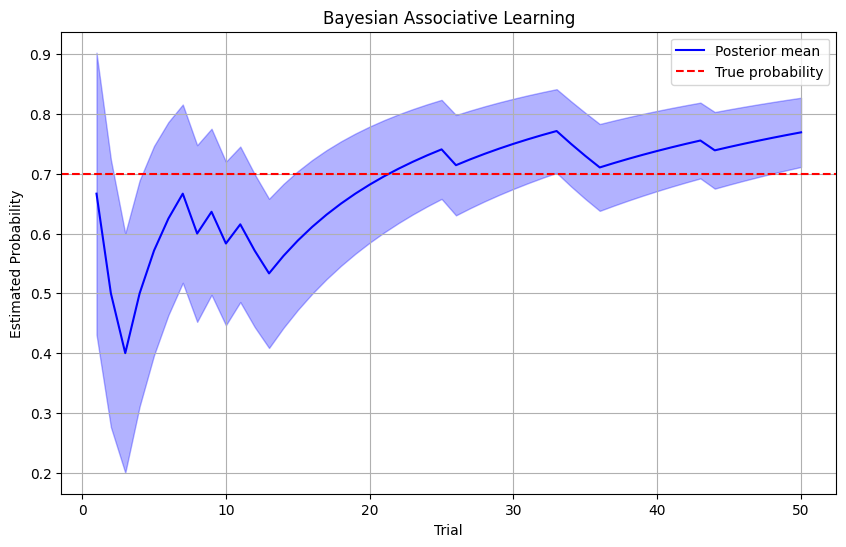

In [18]:
def bayesian_associative_learning(outcomes, prior_alpha=1, prior_beta=1):
    """
    Simulate Bayesian associative learning with a Beta-Bernoulli model.
    
    Parameters:
    -----------
    outcomes : array
        Binary outcomes (0 or 1) observed over time
    prior_alpha : float
        Alpha parameter of the Beta prior
    prior_beta : float
        Beta parameter of the Beta prior
        
    Returns:
    --------
    posterior_means : array
        Posterior mean estimates after each observation
    posterior_stds : array
        Posterior standard deviations after each observation
    """
    n_trials = len(outcomes)
    posterior_means = np.zeros(n_trials)
    posterior_stds = np.zeros(n_trials)
    
    # Initialize posterior parameters with prior
    alpha = prior_alpha
    beta = prior_beta
    
    for t in range(n_trials):
        # Update posterior based on observed outcome
        if outcomes[t] == 1:
            alpha += 1
        else:
            beta += 1
        
        # Calculate posterior mean and standard deviation
        posterior_means[t] = alpha / (alpha + beta)
        posterior_stds[t] = np.sqrt((alpha * beta) / ((alpha + beta)**2 * (alpha + beta + 1)))
    
    return posterior_means, posterior_stds

# Example: Learning the probability of reward in a conditioning experiment
np.random.seed(42)
true_prob = 0.7  # True probability of reward
n_trials = 50
outcomes = np.random.binomial(1, true_prob, n_trials)

# Simulate Bayesian learning
posterior_means, posterior_stds = bayesian_associative_learning(outcomes)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_trials+1), posterior_means, 'b-', label='Posterior mean')
plt.fill_between(
    range(1, n_trials+1),
    posterior_means - posterior_stds,
    posterior_means + posterior_stds,
    alpha=0.3, color='blue'
)
plt.axhline(y=true_prob, color='r', linestyle='--', label='True probability')
plt.xlabel('Trial')
plt.ylabel('Estimated Probability')
plt.title('Bayesian Associative Learning')
plt.legend()
plt.grid(True)
plt.show()

## 6. Practical Considerations in Bayesian Analysis
### 6.1 Prior Selection
The choice of prior distributions is a critical aspect of Bayesian analysis. Let's explore how different priors affect inference:

In [19]:
# def compare_priors(data, prior_specs, n_samples=2000):
#     """
#     Compare how different priors affect posterior inference.
    
#     Parameters:
#     -----------
#     data : array
#         Observed data
#     prior_specs : list of tuples
#         Each tuple contains (prior_name, prior_distribution)
#     n_samples : int
#         Number of posterior samples
        
#     Returns:
#     --------
#     posterior_samples : dict
#         Dictionary with posterior samples for each prior
#     """
#     posterior_samples = {}
    
#     for prior_name, prior_dist in prior_specs:
#         with pm.Model() as model:
#             # Set up the prior
#             theta = prior_dist
            
#             # Likelihood
#             y = pm.Normal('y', mu=theta, sigma=1, observed=data)
            
#             # Sample from posterior
#             trace = pm.sample(n_samples, return_inferencedata=True)
            
#             # Store posterior samples
#             posterior_samples[prior_name] = trace.posterior['theta'].values.flatten()
    
#     return posterior_samples

# # Example: Effect of different priors on estimating the mean of a normal distribution
# np.random.seed(42)
# true_mean = 2.5
# data = np.random.normal(true_mean, 1, 20)  # Small sample size to highlight prior influence

# # Define different priors
# prior_specs = [
#     ('Uninformative', pm.Normal('theta', mu=0, sigma=10)),
#     ('Weakly informative', pm.Normal('theta', mu=0, sigma=3)),
#     ('Informative (correct)', pm.Normal('theta', mu=2, sigma=1)),
#     ('Informative (incorrect)', pm.Normal('theta', mu=5, sigma=1))
# ]

# # Compare priors
# posterior_samples = compare_priors(data, prior_specs)

# # Plot posterior distributions
# plt.figure(figsize=(12, 6))
# for prior_name, samples in posterior_samples.items():
#     sns.kdeplot(samples, label=prior_name)

# plt.axvline(x=true_mean, color='r', linestyle='--', label='True mean')
# plt.axvline(x=np.mean(data), color='k', linestyle=':', label='Sample mean')
# plt.xlabel('Mean')
# plt.ylabel('Density')
# plt.title('Effect of Prior Choice on Posterior Distribution')
# plt.legend()
# plt.grid(True)
# plt.show()

### 6.2 Convergence Diagnostics
Ensuring MCMC convergence is essential for reliable Bayesian inference. Let's implement some convergence diagnostics:

In [20]:
# def convergence_diagnostics(trace, parameter_name):
#     """
#     Calculate and visualize convergence diagnostics for MCMC samples.
    
#     Parameters:
#     -----------
#     trace : InferenceData
#         PyMC trace object
#     parameter_name : str
#         Name of the parameter to diagnose
        
#     Returns:
#     --------
#     diagnostics : dict
#         Dictionary with convergence metrics
#     """
#     # Extract parameter samples
#     param_samples = trace.posterior[parameter_name].values
    
#     # Calculate Gelman-Rubin statistic
#     gr_stat = pm.rhat(trace, var_names=[parameter_name]).to_array().values.flatten()[0]
    
#     # Calculate effective sample size
#     ess = pm.ess(trace, var_names=[parameter_name]).to_array().values.flatten()[0]
    
#     # Compile diagnostics
#     diagnostics = {
#         'rhat': gr_stat,
#         'ess': ess
#     }
    
#     # Plot trace and autocorrelation
#     plt.figure(figsize=(12, 8))
    
#     # Trace plot
#     plt.subplot(2, 1, 1)
#     for chain in range(param_samples.shape[0]):
#         plt.plot(param_samples[chain, :, 0], alpha=0.7)
#     plt.title(f'Trace Plot for {parameter_name}')
#     plt.xlabel('Iteration')
#     plt.ylabel('Parameter Value')
    
#     # Autocorrelation plot
#     plt.subplot(2, 1, 2)
#     for chain in range(param_samples.shape[0]):
#         acf = pm.autocorrplot(param_samples[chain, :, 0], max_lag=100)
#     plt.title(f'Autocorrelation for {parameter_name}')
    
#     plt.tight_layout()
#     plt.show()
    
#     return diagnostics

# # Example: Diagnose convergence for a simple model
# with pm.Model() as model:
#     mu = pm.Normal('mu', mu=0, sigma=1)
#     sigma = pm.HalfCauchy('sigma', beta=1)
#     y = pm.Normal('y', mu=mu, sigma=sigma, observed=np.random.normal(0, 1, 100))
    
#     # Sample with multiple chains
#     trace = pm.sample(1000, chains=4, return_inferencedata=True)

# # Check convergence for mu parameter
# diagnostics = convergence_diagnostics(trace, 'mu')
# print(f"R-hat: {diagnostics['rhat']:.3f}")
# print(f"Effective Sample Size: {diagnostics['ess']:.1f}")

## 7. Conclusion
Bayesian statistics offers a powerful framework for psychological research, providing principled ways to incorporate prior knowledge, quantify uncertainty, and make probabilistic inferences. In this chapter, we've explored the fundamentals of Bayesian analysis and demonstrated its application to various psychological problems.

Key advantages of the Bayesian approach include:

1. Incorporation of prior knowledge : Bayesian methods allow researchers to formally include existing knowledge in their analyses.
2. Full uncertainty quantification : Rather than point estimates, Bayesian analysis provides entire probability distributions.
3. Intuitive interpretation : Posterior probabilities have direct interpretations about our beliefs given the data.
4. Flexibility in model specification : Complex hierarchical models can be specified and estimated.
5. Natural handling of small samples : Bayesian methods can provide reasonable inferences even with limited data.
As computational tools for Bayesian analysis continue to improve, these methods are becoming increasingly accessible to psychological researchers. By understanding the principles and practices of Bayesian statistics, psychologists can enhance their analytical toolkit and gain deeper insights into psychological phenomena.